<a href="https://colab.research.google.com/github/Fuenfgeld/TeamDataScDatenmanagementUndArchivierung/blob/main/PREDICT_COVID_19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratorive Daten Analyse zum Projekt "PREDICT COVID-19"**

Die Dokumentation zu diesen Codes befindet sich im Wiki  [**Ergebnisse der Exploratory Data Analysis**](https://github.com/Fuenfgeld/TeamDataScDatenmanagementUndArchivierung/wiki/Ergebnisse-der-Exploratory-Data-Analysis)

#1. Environment erstellen

##Variabeln löschen

In [ ]:
%reset -f

## Install Packages

In [ ]:
pip install dexplot

##Import Libraries

In [ ]:
import sys
import pandas as pd
from pandas.util import hash_pandas_object
import numpy as np
import sqlite3 as sq
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_theme(style="darkgrid")
import dexplot as dxp
from sqlite3 import Error
from google.colab import drive
from pandas_profiling import ProfileReport
from scipy import stats



drive.mount('/content/drive/', force_remount=True)
 
db_path = '/content/drive/MyDrive/db_files/cov_alle.db'

Mounted at /content/drive/


##Configuration

In [ ]:
%matplotlib inline

##Versioncheck

In [ ]:
#Python
sys.version_info

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)

In [ ]:
#pandas
pd.__version__

'1.1.5'

In [ ]:
#seaborn
sns.__version__

'0.11.1'

In [ ]:
#matplotlib
mlp.__version__

'3.2.2'

In [ ]:
#numpy
np.__version__

'1.19.5'

In [ ]:
#sqlite3
sq.version

'2.6.0'

### Versionen der Umgebung und Bibliotheken (Zusammenfassung)

|Bibliothek|Version|
|-|-|
| pandas |1.1.5|
| numpy |1.19.5|
| sqlite3 |2.6.0|
| matplotlib |3.2.2|
| seaborn |0.11.1|
| scipy | 1.4.1|
| google|2.0.3|
| dexplot | 0.1.4 |

In [ ]:
# %pip freeze

# 2. Connect to Database

In [ ]:
def connect_to_db(db_file):
    sqlite3_conn = None
    try:
        sqlite3_conn = sq.connect(db_file)
        return sqlite3_conn

    except Error as err:
        print(err)

        if sqlite3_conn is not None:
            sqlite3_conn.close()

conn = connect_to_db(db_path)
cursor_dwh = conn.cursor()

## Rechne Checksum des Data Sets in Data Warehouse

### Views
* `v_patients`
* `v_observations`
* `v_procedures`
* `v_conditions`


### Laden alle Views

In [ ]:
data_to_check = {} # list with all views to calculate the checksum

In [ ]:
data_to_check['v_patients'] = pd.read_sql_query("select * from v_patients order by STUDY;", conn)
df_patient = data_to_check['v_patients'] # work patient data frame
data_to_check['v_obsevations'] = pd.read_sql_query("select * from v_observations;", conn)
data_to_check['v_conditions'] = pd.read_sql_query("select * from v_conditions;", conn)
data_to_check['v_procedures'] = pd.read_sql_query("select * from v_procedures;", conn)

### Rechne Checksum der Data set

In [ ]:
"""for hash_sum in data_to_check.keys():
  hash_panda = hash_pandas_object(data_to_check[hash_sum])
  print(hash_sum + ': ' + str(hash_panda.sum()))"""

#data_to_check = {} # list is empty again

"for hash_sum in data_to_check.keys():\n  hash_panda = hash_pandas_object(data_to_check[hash_sum])\n  print(hash_sum + ': ' + str(hash_panda.sum()))"

## Values der Checksum

- patient_hash = -7859261951099209217
- observation_hash = -3635545708015187929
- condition_hash = 7763097818079627044
- procedure_hash = 2659393736792874138

# 3. Abfragen

## 3.1. Data Frame mit allen Patienten

In [ ]:
pd.concat([df_patient.head(3), df_patient.tail(3)])

,PATIENT,BIRTHYEAR,DEATHYEAR,MARITAL,RACE,ETHNICITY,GENDER,CITY,AGE,STUDY
0,0044c386d3496f1e22912166a5622655,1974,2021,M,white,hispanic,F,Hanover,47,Allergy
1,006ac4c59e4aeee8ea94f75f6080bce1,1959,2021,M,white,nonhispanic,M,Sutton,62,Allergy
2,0ba02717bcc5f0be5201e7ae40e88b4c,1951,2021,M,white,nonhispanic,M,Dartmouth,70,Allergy
1182,ff1a3fc2ecaa41ed65a70004ba1d0e88,2010,2021,M,asian,nonhispanic,M,Dedham,11,COVID-19
1183,ff47a635ef41b8cf1dc36ce6be637fc6,1998,2021,M,white,nonhispanic,M,Belmont,23,COVID-19
1184,ff980902044d1261b8a197c9df95fe4e,1994,2021,M,white,hispanic,M,Lawrence,27,COVID-19


### 3.1.1 Grundlegende Charakteristika aller Patienten

In [ ]:
print('Columns.')
print(df_patient.columns)
print()
print('Count.')
print(df_patient.count())
print()
print('Describe the Age of living patients.')
print(df_patient.loc[df_patient['DEATHYEAR'] == 2021].AGE.describe())
print()
print('Information.')
print(df_patient.info())

Columns.
Index(['PATIENT', 'BIRTHYEAR', 'DEATHYEAR', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'CITY', 'AGE', 'STUDY'],
      dtype='object')

Count.
PATIENT      1185
BIRTHYEAR    1185
DEATHYEAR    1185
MARITAL      1185
RACE         1185
ETHNICITY    1185
GENDER       1185
CITY         1185
AGE          1185
STUDY        1185
dtype: int64

Describe the Age of living patients.
count    1100.000000
mean       41.129091
std        23.876763
min         1.000000
25%        21.000000
50%        38.000000
75%        60.000000
max       111.000000
Name: AGE, dtype: float64

Information.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PATIENT    1185 non-null   object
 1   BIRTHYEAR  1185 non-null   int64 
 2   DEATHYEAR  1185 non-null   int64 
 3   MARITAL    1185 non-null   object
 4   RACE       1185 non-null   object
 5   ETHNICITY  1185 non

### 3.1.2 Patientenalter nach Studie

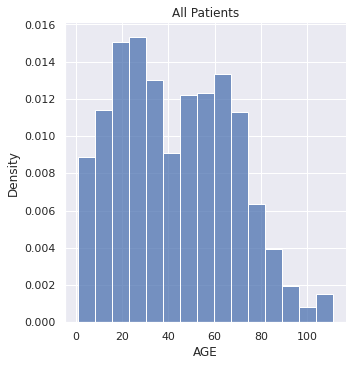

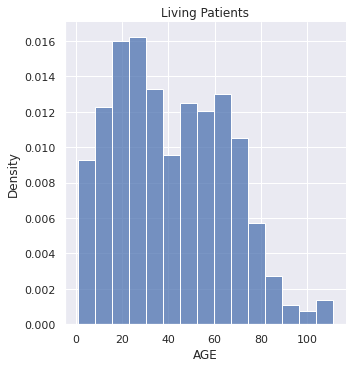

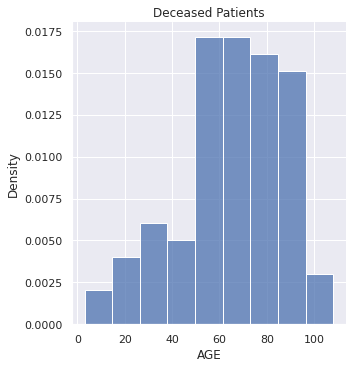

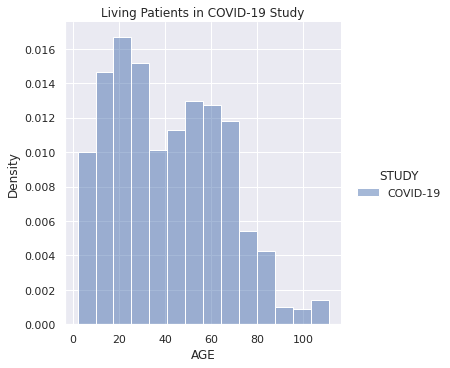

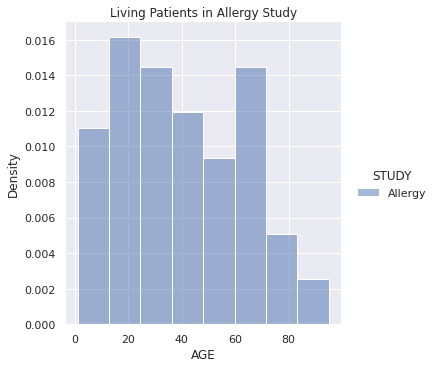

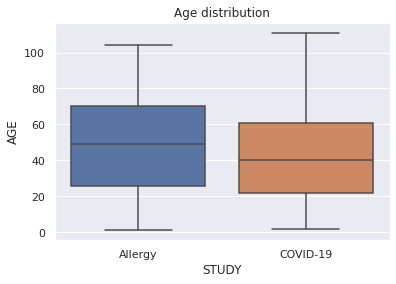

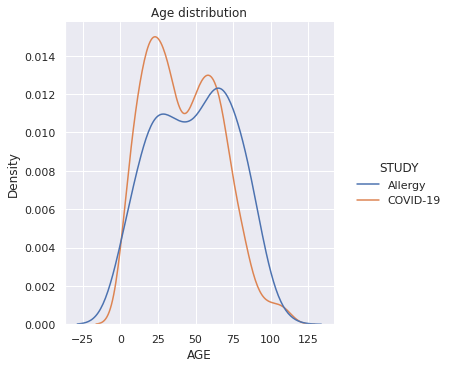

In [ ]:
sns.displot(data=df_patient, x="AGE", stat="density", common_norm=False)
plt.title('All Patients')
plt.show()

sns.displot(data=df_patient.loc[df_patient['DEATHYEAR'] == 2021], x="AGE", stat="density", common_norm=False)
plt.title('Living Patients')
plt.show()

sns.displot(data=df_patient.loc[df_patient['DEATHYEAR'] < 2021], x="AGE",  stat="density", common_norm=False)
plt.title('Deceased Patients')
plt.show()

sns.displot(data=df_patient.loc[(df_patient['DEATHYEAR'] == 2021) & (df_patient['STUDY'] == "COVID-19")], hue = "STUDY", x="AGE", stat="density", common_norm=False)
plt.title('Living Patients in COVID-19 Study')
plt.show()

sns.displot(data=df_patient.loc[(df_patient['DEATHYEAR'] == 2021) & (df_patient['STUDY'] == "Allergy")], hue = "STUDY", x="AGE", stat="density", common_norm=False)
plt.title('Living Patients in Allergy Study')
plt.show()

sns.boxplot(x=df_patient.STUDY, y=df_patient.AGE)
plt.title('Age distribution')
plt.show()

sns.displot(data=df_patient, x="AGE", hue="STUDY", kind="kde", common_norm=False)
plt.title('Age distribution')
plt.show()

3.3. Geschlecht

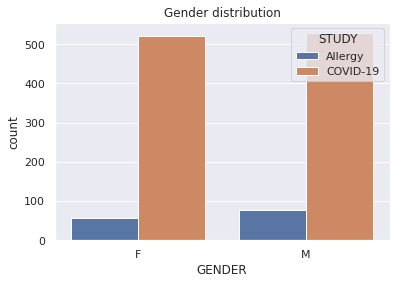

In [ ]:
sns.countplot(x='GENDER', hue = 'STUDY', data=df_patient)
plt.title('Gender distribution')
plt.show()

### 3.1.3 Hautfarbe ("Race")

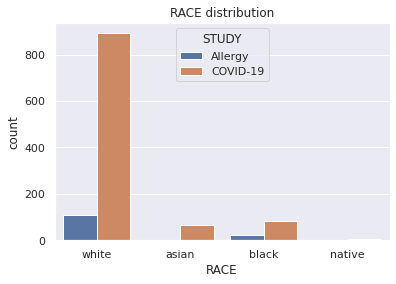

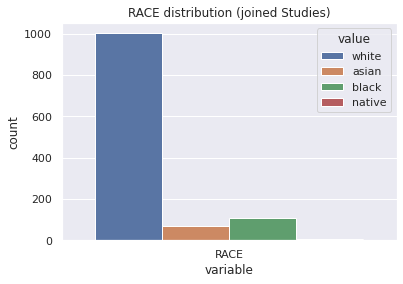

In [ ]:
sns.countplot(x='RACE', hue = 'STUDY', data=df_patient)
plt.title('RACE distribution')
plt.show()

sns.countplot(x="variable", hue= "value", data=pd.melt(df_patient[["RACE"]]))
plt.title('RACE distribution (joined Studies)')
plt.show()

### 3.1.4 Ethnie

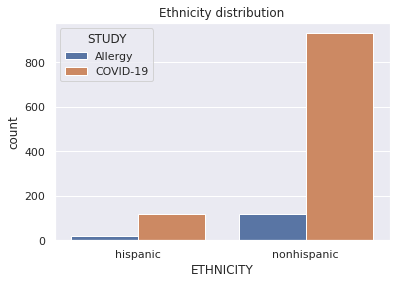

In [ ]:
sns.countplot(x='ETHNICITY', hue = 'STUDY', data=df_patient)
plt.title('Ethnicity distribution')
plt.show()

## 3.2. Ein- und Auschlusskriterien (Abbildung 1)

Nachfolgend wurden mittels SQL-queries Patienten aus den Datensätzen "COVID-19" und "Allergy" ausgeschlossen, 
1. die nicht getetest worden sind
2. deren PCR Ergebnis negativ war

### 3.2.1. Nicht vorhandener SARS-CoV-2-Test

In [ ]:
df_test_COVID_no_tested = pd.read_sql_query("""
  select 
    count(DISTINCT PATIENT) Not_tested_for_COVID, 
    STUDY
  from v_observations
  where PATIENT not in (
    select 
      distinct PATIENT 
    from v_observations 
    where DESCRIPTION LIKE '%SARS-CoV-2%'
    )
   GROUP BY STUDY
     union
    select 
    count(DISTINCT PATIENT) Not_tested_for_COVID, 
    'Total no tested for COVID-19'
  from v_observations
  where PATIENT not in (
    select 
      distinct PATIENT 
    from v_observations 
    where DESCRIPTION LIKE '%SARS-CoV-2%'
    ) 
   ;""", conn)

df_test_COVID_no_tested

#Count non tested Patients

,Not_tested_for_COVID,STUDY
0,45,Allergy
1,145,COVID-19
2,190,Total no tested for COVID-19


###3.2.2. Negativer SARS-CoV-2-Test

In [ ]:
df_test_COVID_neg = pd.read_sql_query("""
   select 
    count(DISTINCT PATIENT) Negative_COVID19_Tests , 
    DESCRIPTION, VALUE, STUDY
  from v_observations
  where DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE '%Not detected%'
  group by DESCRIPTION, VALUE, STUDY
    UNION
  SELECT
  count(DISTINCT PATIENT), 
    DESCRIPTION, VALUE, 'Total negative'
  from v_observations
  where DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE '%Not detected%'
  group by DESCRIPTION, VALUE
  ORDER BY DESCRIPTION DESC;""", conn)

df_test_COVID_neg

#Count Negative Test

,Negative_COVID19_Tests,DESCRIPTION,VALUE,STUDY
0,13,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),Allergy
1,145,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),COVID-19
2,158,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),Total negative


### 3.2.2. Positiver SARS-CoV-2-Test

In [ ]:
df_test_COVID_pos = pd.read_sql_query("""select 
  count(DISTINCT PATIENT) Positive_COVID19_Tests , 
  DESCRIPTION, VALUE, STUDY
  from v_observations
  where DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE '%Detected%'
  AND VALUE NOT LIKE '%Not%'
  group by DESCRIPTION, VALUE, STUDY
    UNION 
  SELECT count(DISTINCT PATIENT),
    DESCRIPTION, VALUE, 'Total positive'
  from v_observations
  where DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE '%Detected%'
  AND VALUE NOT LIKE '%Not%'
  group by DESCRIPTION, VALUE
  ORDER BY DESCRIPTION DESC;""", conn)

df_test_COVID_pos

#Count Positive Test

,Positive_COVID19_Tests,DESCRIPTION,VALUE,STUDY
0,86,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),Allergy
1,865,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),COVID-19
2,951,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),Total positive


#### **Einteilung in schwerer vs. milder Verlauf**

Ein schwerer Verlauf wurde bei Patienten mit endotrachealer Intubation angenommen. Ein milder Verlauf bei allen nicht intubierten Patienten.

Dazu wurde ein Label namens "PROGRESS" erstellt:
- Severe COVID-19
- Mild COVID-19

In [ ]:
df_patient_covid = pd.read_sql_query("""
   select 
  DISTINCT vo.PATIENT,
  vo.BIRTHYEAR ,
  vo.DEATHYEAR ,
  vo.MARITAL ,
  vo.RACE ,
  vo.ETHNICITY ,
  vo.GENDER ,
  vo.CITY ,
  vo.AGE ,
  vo.STUDY,
  CASE 
      WHEN vp.DESCRIPTION LIKE '%endo%tube%' 
        THEN 'Severe COVID-19' 
      ELSE 'Mild COVID-19' 
    END PROGRESS 
  from v_observations vo
  join v_procedures vp
  on vp.PATIENT = vo.PATIENT 
  where vo.DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE 'Detected%' 
  GROUP by vo.PATIENT
  having max(LENGTH(PROGRESS))
  ORDER BY PROGRESS DESC; 
  """, conn)
df_patient_covid.head(24)

,PATIENT,BIRTHYEAR,DEATHYEAR,MARITAL,RACE,ETHNICITY,GENDER,CITY,AGE,STUDY,PROGRESS
0,1c40fa86e8b68b6719d752474e321733,1960,2020,M,white,nonhispanic,M,Wellesley,60,COVID-19,Severe COVID-19
1,3becdcd73c8e32dfb67d21d2bf0cfa09,1998,2020,M,white,nonhispanic,M,Wrentham,22,COVID-19,Severe COVID-19
2,3c51c7967432c9cadec1f28910c03dfa,1998,2020,M,white,hispanic,M,Rutland,22,COVID-19,Severe COVID-19
3,44e35b270b123de0b7709955081c0f4f,1920,2020,M,native,hispanic,F,Westfield,100,COVID-19,Severe COVID-19
4,4a02bb01b2f7c8e1c5fb43bd9efd0a7d,1935,2020,M,asian,hispanic,M,Malden,85,COVID-19,Severe COVID-19
5,612754216f7960eb30b4bbe235ce8067,1928,2020,M,white,nonhispanic,F,Swansea,92,COVID-19,Severe COVID-19
6,626f09c01aab7d34f99de599ff06ea48,1926,2020,M,black,hispanic,M,Westfield,94,Allergy,Severe COVID-19
7,6367bd50d10b816b9a595877684765a9,1940,2020,M,white,nonhispanic,F,Wellesley,80,COVID-19,Severe COVID-19
8,6d036b6bfcb504cad95bf7def5cd607f,1952,2020,S,black,nonhispanic,F,Springfield,68,COVID-19,Severe COVID-19
9,752207afae6fa4dcd38fc2f4796bafd4,1916,2020,S,white,nonhispanic,M,Tewksbury,104,Allergy,Severe COVID-19


Es wurden insgesamt **951 Patienten** eingeschlossen, wovon 23 einen schweren und 928 einen milden Verlauf hatten.

##4. Patientenbezogene Risikofaktoren

##4.1. Alter (Abbildung 3, Tabelle 1)

In [ ]:
sns.set_theme(style="ticks", color_codes=True)

Text(0.5, 1.0, 'Altersverteilung')

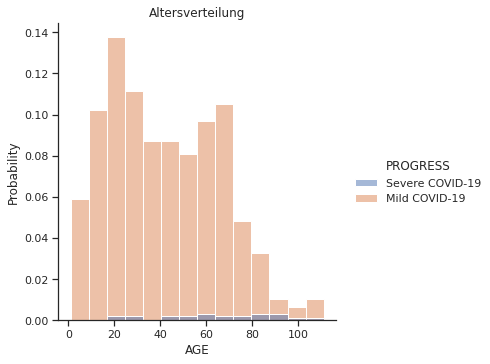

In [ ]:
#Basic Histogramm
sns.displot(data=df_patient_covid, x="AGE", hue="PROGRESS", stat="probability")
plt.title('Altersverteilung')

Text(0.5, 1.0, 'Altersverteilung')

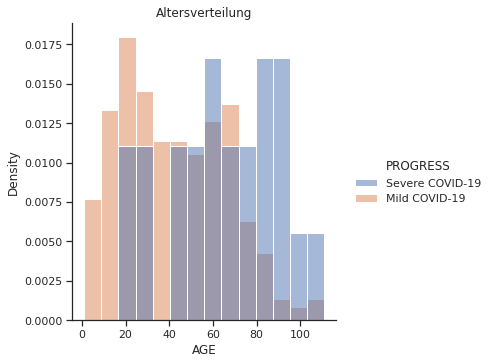

In [ ]:
#Normalisiertes Histogramm
sns.displot(data=df_patient_covid, x="AGE", hue="PROGRESS", stat="density", common_norm=False)
plt.title('Altersverteilung')

Text(0.5, 1.0, 'Altersverteilung')

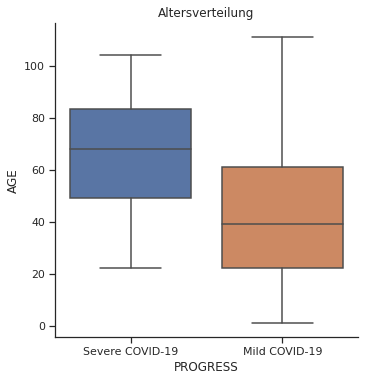

In [ ]:
#Boxplots
sns.catplot(data=df_patient_covid, x="PROGRESS", y="AGE", kind="box")
plt.title('Altersverteilung')

Text(0.5, 1.0, 'Altersverteilung')

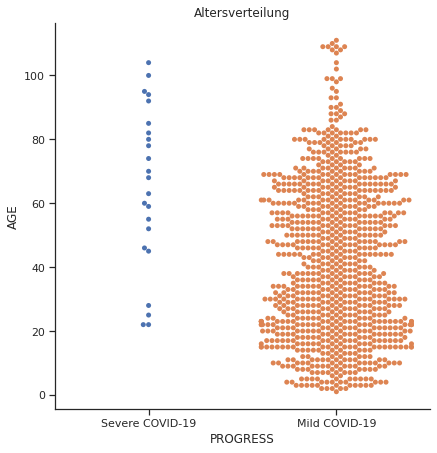

In [ ]:
#Scatterplots
sns.catplot(data=df_patient_covid, x="PROGRESS", y="AGE", kind="swarm", height=6)
plt.title('Altersverteilung')


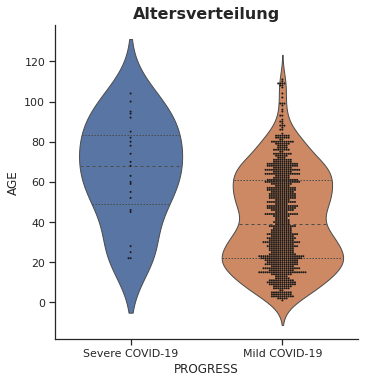

In [ ]:
#Swarm+Violin Plot + IQR
g = sns.catplot(data=df_patient_covid, x="PROGRESS", y="AGE", kind="violin", inner="quart", linewidth=1)
sns.swarmplot(data=df_patient_covid, x="PROGRESS", y="AGE", color="k", size=2, ax=g.ax)
plt.title('Altersverteilung', weight='bold').set_fontsize('16')

Text(0.5, 1.0, 'Altersverteilung')

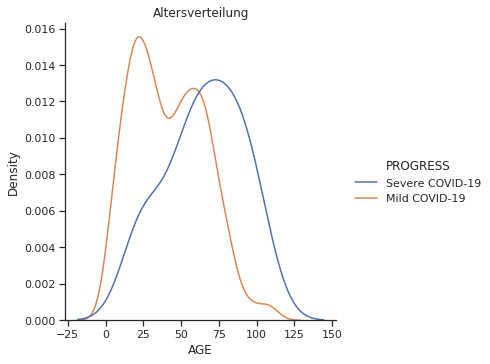

In [ ]:
#Kernel Distribution
sns.displot(data=df_patient_covid, x="AGE", hue="PROGRESS", kind="kde", common_norm=False)
plt.title('Altersverteilung')

###Statistische Analyse

In [ ]:
#Deskriptive Statistik Alter
df_patient_severe_covid = df_patient_covid[df_patient_covid["PROGRESS"] == 'Severe COVID-19']
df_patient_severe_covid["AGE"].describe()

count     23.000000
mean      65.173913
std       25.383696
min       22.000000
25%       49.000000
50%       68.000000
75%       83.500000
max      104.000000
Name: AGE, dtype: float64

In [ ]:
#Deskriptive Statistik Alter
df_patient_mild_covid = df_patient_covid[df_patient_covid["PROGRESS"] == 'Mild COVID-19']
df_patient_mild_covid["AGE"].describe()

count    928.000000
mean      41.790948
std       24.019038
min        1.000000
25%       22.000000
50%       39.000000
75%       61.000000
max      111.000000
Name: AGE, dtype: float64

**Null und Alternativhypothese**

1. Nullhypothese: Der Mittelwert für **Alter** unterscheiden sich nicht in Severe vs. Mild COVID-19
2. Alternativhypothese: Der  Mittelwert für **Alter** unterscheidet sich in Severe vs. Mild COVID-19

In [ ]:
# Transformation einer DF-Säule in einen numpy array
o = df_patient_severe_covid["AGE"].to_numpy()
p = df_patient_mild_covid["AGE"].to_numpy()

Berechnung des T-Testes für die Mittelwerte der beiden Gruppen (standard independent 2 sample  t-test)

In [ ]:
stats.ttest_ind(o, p, equal_var = True)

Ttest_indResult(statistic=4.605790132509762, pvalue=4.668598376174012e-06)

**Interpretation:**

Die Nullhypothese kann verworfen werden, da der p-Value kleiner als 5% ist.

**Zusammenfassung:**
1.   Das Durchschnittsalter (arithm. Mittel) der Patienten in der Gruppe "Severe COVID-19" ist 65 Jahre.
2.   Das Durchschnittsalter (arithm. Mittel) der Patienten in der Gruppe "Mild COVID-19" ist 41 Jahre.
3.   Der Altersunterschied ist **statistisch signifikant (P < 5%)** 


## 4.2. Geschlecht (Abbildung 4, Tabelle 2)

Zur Normalisierung ist das Paket **dexplot** besser als **seaborn** geeignet (nötig, da die Gruppengröße sehr untrschiedlich ist)

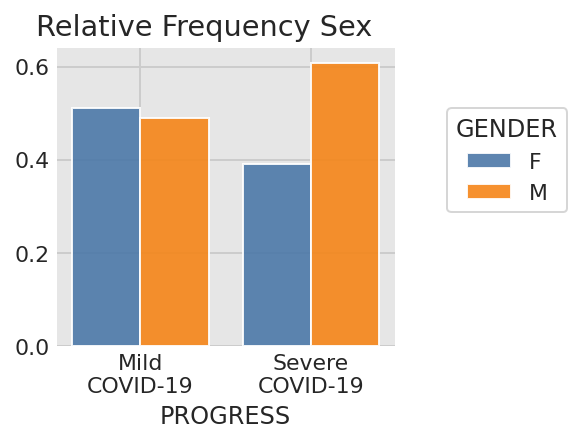

In [ ]:
dxp.count(val='PROGRESS', data=df_patient_covid, split='GENDER', normalize='PROGRESS', title='Relative Frequency Sex', figsize=[3.0,3.0], size=0.8)

Zur genaueren Quantifizierung:

In [ ]:
filtermales_Severe = df_patient_covid[(df_patient_covid['GENDER'] == 'M') & (df_patient_covid['PROGRESS'] == 'Severe COVID-19')]
filtermales_Severe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 20
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PATIENT    14 non-null     object
 1   BIRTHYEAR  14 non-null     int64 
 2   DEATHYEAR  14 non-null     int64 
 3   MARITAL    14 non-null     object
 4   RACE       14 non-null     object
 5   ETHNICITY  14 non-null     object
 6   GENDER     14 non-null     object
 7   CITY       14 non-null     object
 8   AGE        14 non-null     int64 
 9   STUDY      14 non-null     object
 10  PROGRESS   14 non-null     object
dtypes: int64(3), object(8)
memory usage: 1.3+ KB


In [ ]:
filterfemales_Severe = df_patient_covid[(df_patient_covid['GENDER'] == 'F') & (df_patient_covid['PROGRESS'] == 'Severe COVID-19')]
filterfemales_Severe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 3 to 22
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PATIENT    9 non-null      object
 1   BIRTHYEAR  9 non-null      int64 
 2   DEATHYEAR  9 non-null      int64 
 3   MARITAL    9 non-null      object
 4   RACE       9 non-null      object
 5   ETHNICITY  9 non-null      object
 6   GENDER     9 non-null      object
 7   CITY       9 non-null      object
 8   AGE        9 non-null      int64 
 9   STUDY      9 non-null      object
 10  PROGRESS   9 non-null      object
dtypes: int64(3), object(8)
memory usage: 864.0+ bytes


In [ ]:
filtermales_Mild = df_patient_covid[(df_patient_covid['GENDER'] == 'M') & (df_patient_covid['PROGRESS'] == 'Mild COVID-19')]
filtermales_Mild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 24 to 950
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PATIENT    454 non-null    object
 1   BIRTHYEAR  454 non-null    int64 
 2   DEATHYEAR  454 non-null    int64 
 3   MARITAL    454 non-null    object
 4   RACE       454 non-null    object
 5   ETHNICITY  454 non-null    object
 6   GENDER     454 non-null    object
 7   CITY       454 non-null    object
 8   AGE        454 non-null    int64 
 9   STUDY      454 non-null    object
 10  PROGRESS   454 non-null    object
dtypes: int64(3), object(8)
memory usage: 42.6+ KB


In [ ]:
filterfemales_Mild = df_patient_covid[(df_patient_covid['GENDER'] == 'F') & (df_patient_covid['PROGRESS'] == 'Mild COVID-19')]
filterfemales_Mild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 23 to 946
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PATIENT    474 non-null    object
 1   BIRTHYEAR  474 non-null    int64 
 2   DEATHYEAR  474 non-null    int64 
 3   MARITAL    474 non-null    object
 4   RACE       474 non-null    object
 5   ETHNICITY  474 non-null    object
 6   GENDER     474 non-null    object
 7   CITY       474 non-null    object
 8   AGE        474 non-null    int64 
 9   STUDY      474 non-null    object
 10  PROGRESS   474 non-null    object
dtypes: int64(3), object(8)
memory usage: 44.4+ KB


**Ergebnis:**
1.   14 von 23 (=60,8%) der Patienten in der Gruppe "Severe COVID-19" waren Männer.
2.   454 von 928 (=48,9%) In der Gruppe "Mild COVID-19" waren Männern, 51,1% Frauen.



# 5. Häufigkeit der Diagnosen, Prozeduren und Messungen

##5.1. 20 häufigste Symptome/Diagnosen bein COVID-19 Patienten

In [ ]:
# patients quantity by conditions (the diagnoses Suspected COVID-19 and COVID-19 were removed)
df_quanti_patient_condition = pd.read_sql_query("""
  SELECT 
    count(DISTINCT PATIENT) PATIENTS_QUANTITY, 
    DESCRIPTION 
  from v_conditions vo 
  where DESCRIPTION NOT LIKE '%CO%' 
  AND STUDY like '%C%' 
  group by DESCRIPTION 
  order by PATIENTS_QUANTITY desc;""", conn)
df_quanti_patient_condition.head(20)

,PATIENTS_QUANTITY,DESCRIPTION
0,807,Fever (finding)
1,459,Loss of taste (finding)
2,348,Fatigue (finding)
3,298,Sputum finding (finding)
4,171,Dyspnea (finding)
5,171,Wheezing (finding)
6,145,Joint pain (finding)
7,145,Muscle pain (finding)
8,129,Hypoxemia (disorder)
9,129,Pneumonia (disorder)


**Plotting**

Die Häufigkeit der Symptome bei COVID-19 Patienten wurde mit einem Histogramm dargestellt. Die 5 häufigsten Symptome 

1.   Fieber
2.   Geschmacksverlust
3.   Müdigkeit
4.   Sputum
5.   Atemnot

In [ ]:
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 2.5})

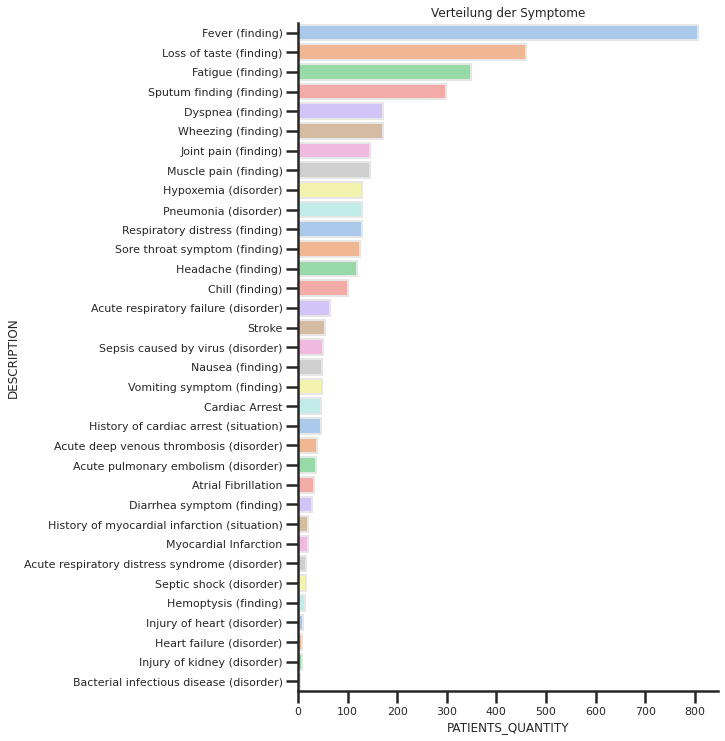

In [ ]:
sns.catplot(data=df_quanti_patient_condition, y="DESCRIPTION", x="PATIENTS_QUANTITY", kind="bar", palette="pastel", edgecolor=".9", height=10, aspect=1)
plt.title('Verteilung der Symptome')
plt.show()

##5.2. 20 häufigste Prozeduren bei COVID-19 Patienten

In [ ]:
df_quanti_patient_procedure = pd.read_sql_query("""
select count(DISTINCT PATIENT) PATIENT, DESCRIPTION from v_procedures vp where PATIENT in (
 select 
  DISTINCT vo.PATIENT
  from v_observations vo
  join v_procedures vp
  on vp.PATIENT = vo.PATIENT 
  where vo.DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE 'Detected%')
 GROUP by DESCRIPTION 
 ORDER by PATIENT DESC ;
""",conn)
df_quanti_patient_procedure.head(20)

,PATIENT,DESCRIPTION
0,951,Face mask (physical object)
1,146,Plain chest X-ray (procedure)
2,140,Oxygen administration by mask (procedure)
3,140,Placing subject in prone position (procedure)
4,85,Medication Reconciliation (procedure)
5,31,Catheter ablation of tissue of heart
6,29,Electrical cardioversion
7,26,Echocardiography (procedure)
8,23,Controlled ventilation procedure and therapy ...
9,23,Insertion of endotracheal tube (procedure)


**Plotting**



Die Häufigkeit der **Maßnahmen** bei COVID-19 Patienten wurde mit einem Histogramm dargestellt. Die 5 häufigsten Prozeduren:

1.   Face mask (Gesichtsmaske)
2.   Plain chest X-ray (procedure)
3.   Oxygen adminstration by mask (procedure)
4.   Pl
1.   Listeneintrag


In [ ]:
df_proc_5 = df_quanti_patient_procedure.head(5)

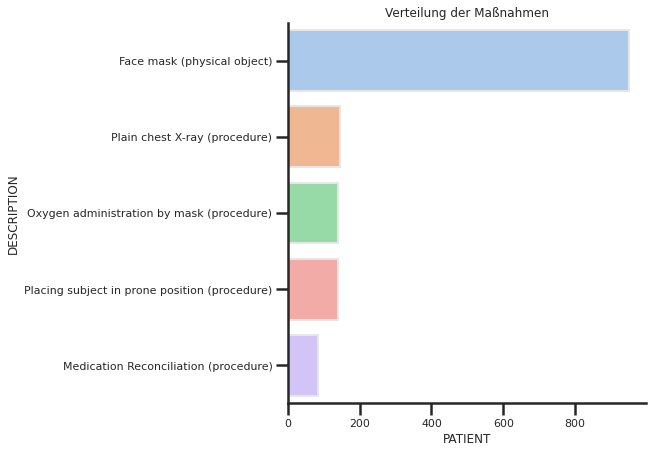

In [ ]:
sns.catplot(data=df_proc_5, y="DESCRIPTION", x="PATIENT", kind="bar", palette="pastel", edgecolor=".9", height=6, aspect=1.5)
plt.title('Verteilung der Maßnahmen')
plt.show()

**Ergebnis:**
Die mit Abstand häufigste Maßnahme war eine Gesichtsmaske, gefolgt von Thorax-Röntgen und Sauerstoffgabe über eine Maske.

##5.3. 20 häufigste Messungen bei COVID-19 Patienten

In [ ]:
df_quanti_patient_observation = pd.read_sql_query("""
select count(DISTINCT PATIENT) PATIENT, DESCRIPTION from v_observations vo where PATIENT in (
 select 
  DISTINCT vo.PATIENT
  from v_observations vo
  join v_procedures vp
  on vp.PATIENT = vo.PATIENT 
  where vo.DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE 'Detected%')
 GROUP by DESCRIPTION 
 ORDER by PATIENT DESC ;
""",conn)
df_quanti_patient_observation.head(20)

,PATIENT,DESCRIPTION
0,951,Body Weight
1,951,Body temperature
2,951,DALY
3,951,Diastolic Blood Pressure
4,951,Heart rate
5,951,Oxygen saturation in Arterial blood
6,951,QALY
7,951,QOLS
8,951,Respiratory rate
9,951,SARS-CoV-2 RNA Pnl Resp NAA+probe


**Plotting**

Die Häufigkeit der Messungen bei COVID-19 Patienten wurde mit einem Histogramm dargestellt

In [ ]:
df_obs_20 = df_quanti_patient_observation.head(20)

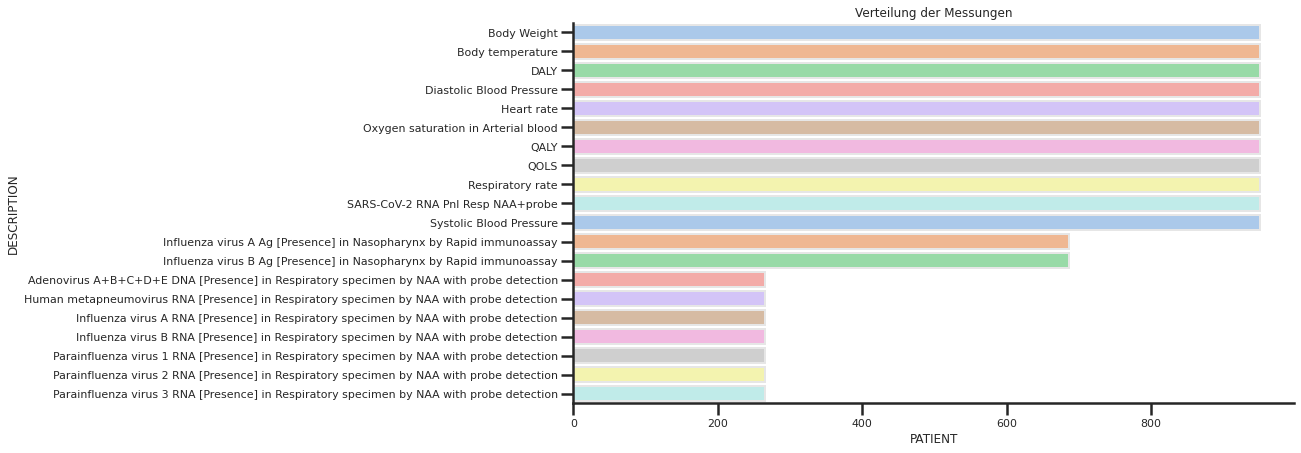

In [ ]:
sns.catplot(data=df_obs_20, y="DESCRIPTION", x="PATIENT", kind="bar", palette="pastel", edgecolor=".9", height=6, aspect=3)
plt.title('Verteilung der Messungen')
plt.show()

**Ergebnis:** Standard Parameter wie Körpergewicht und Körpertemperatur wurden bei allen Patienten erholben, ebenso die Sauerstoffsätigung im Blut und die Respiratory rate. Dies kann für weitere Untersuchungen nützlich sein.

#6. Weitere Risikofaktoren

###Spalten Vorerkrankungen und Klinik

Es wurden die folgenden Spalten für die Korrelationsanalyse erstellt:

Geschlecht

| GENDER_ID | GENDER |
|-|-|
| 1 | F|
| 2 | M|

RACE

| RACE_ID | RACE |
|-|-|
|1|white|
|2| black|
|3|asian|
|4|native|

|ETHNICITY_ID	| ETHNICITY|
|-|-|
|1|nonhispanic|
|2|hispanic|

DIABETES

|Wert|Beschreibung|
|-|-|
|0 |Nein|
|1 |Ja| 

BMI	

|Wert|Beschreibung|
|-|-|
|0 |Nein|
|1 |30+ - obesity (finding)| 
|2 |40+ - severely obese (finding)| 

CORONARY_HEART_DISEASE	

|Wert|Beschreibung|
|-|-|
|0 |Nein|
|1 |Ja| 


FEVER

|Wert|Beschreibung|
|-|-|
|0 |Nein|
|1 |Ja| 

O2ADM: Oxygen administration by mask (procedure)

|Wert|Beschreibung|
|-|-|
|0 |Nein|
|1 |Ja| 

LOSS_TASTE: Loss of taste

|Wert|Beschreibung|
|-|-|
|0 |Nein|
|1 |Ja| 


##6.1  Vorerkrankungen und Risikofaktoren

###Erstellung des Data frame

In [ ]:
# create temporary table

cursor_dwh.executescript("""
DROP table if exists comorbidity;
create table comorbidity as
select 
  DISTINCT vo.PATIENT,
  vo.BIRTHYEAR ,
  vo.DEATHYEAR ,
  vo.MARITAL ,
  dm.ID MARITAL_ID,
  vo.RACE ,
  dr.ID RACE_ID,
  vo.ETHNICITY ,
  de.ID ETHNICITY_ID,
  vo.GENDER ,
  dg.ID GENDER_ID,
  vo.CITY ,
  dc.ID CITY_ID,
  vo.AGE ,
  vo.STUDY, 
  '0' BMI, --condition DESCRIPTION LIKE Body mass index 30%' 'Body mass index 40%'
  '0' CORONARY_HEART_DISEASE, -- condition DESCRIPTION LIKE 'Coronary Heart%'
  CASE 
      WHEN vp.DESCRIPTION LIKE '%endo%tube%' 
        THEN 'Severe COVID-19' 
      ELSE 'Mild COVID-19' 
    END PROGRESS 
  from v_observations vo
  join v_procedures vp
    on vp.PATIENT = vo.PATIENT
  join dimCity dc
    on vo.CITY = dc.CITY 
  join dimRace dr
    on dr.RACE = vo.RACE 
  join dimEthnicity de
    on vo.ETHNICITY = de.ETHNICITY 
  join dimGender dg
    on dg.GENDER = vo.GENDER 
  join dimMarital dm
    on dm.MARITAL = vo.MARITAL 
  where vo.DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE 'Detected%' 
  GROUP by vo.PATIENT
  having max(LENGTH(PROGRESS))
  ORDER BY PROGRESS DESC;  
 
 
update comorbidity set BMI = '1' where PATIENT IN (select PATIENT FROM v_conditions WHERE DESCRIPTION LIKE 'Body mass index 30%');
update comorbidity set BMI = '2' where PATIENT IN (select PATIENT FROM v_conditions WHERE DESCRIPTION LIKE 'Body mass index 40%');
update comorbidity set CORONARY_HEART_DISEASE = '1' where PATIENT IN (select PATIENT FROM v_conditions WHERE DESCRIPTION LIKE 'Coronary Heart%');
""")


In [ ]:
df_covid_comorbidity = pd.read_sql_query("select * from comorbidity order by PROGRESS DESC;", conn)
cursor_dwh.execute("drop table if exists comorbidity")
df_covid_comorbidity.head(3)

,PATIENT,BIRTHYEAR,DEATHYEAR,MARITAL,MARITAL_ID,RACE,RACE_ID,ETHNICITY,ETHNICITY_ID,GENDER,GENDER_ID,CITY,CITY_ID,AGE,STUDY,BMI,CORONARY_HEART_DISEASE,PROGRESS
0,1c40fa86e8b68b6719d752474e321733,1960,2020,M,1,white,1,nonhispanic,1,M,2,Wellesley,129,60,COVID-19,0,0,Severe COVID-19
1,3becdcd73c8e32dfb67d21d2bf0cfa09,1998,2020,M,1,white,1,nonhispanic,1,M,2,Wrentham,101,22,COVID-19,0,0,Severe COVID-19
2,3c51c7967432c9cadec1f28910c03dfa,1998,2020,M,1,white,1,hispanic,2,M,2,Rutland,152,22,COVID-19,0,0,Severe COVID-19


In [ ]:
df_covid_comorbidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PATIENT                 951 non-null    object
 1   BIRTHYEAR               951 non-null    int64 
 2   DEATHYEAR               951 non-null    int64 
 3   MARITAL                 951 non-null    object
 4   MARITAL_ID              951 non-null    int64 
 5   RACE                    951 non-null    object
 6   RACE_ID                 951 non-null    int64 
 7   ETHNICITY               951 non-null    object
 8   ETHNICITY_ID            951 non-null    int64 
 9   GENDER                  951 non-null    object
 10  GENDER_ID               951 non-null    int64 
 11  CITY                    951 non-null    object
 12  CITY_ID                 951 non-null    int64 
 13  AGE                     951 non-null    int64 
 14  STUDY                   951 non-null    object
 15  BMI   

###Analyse

 **BMI**

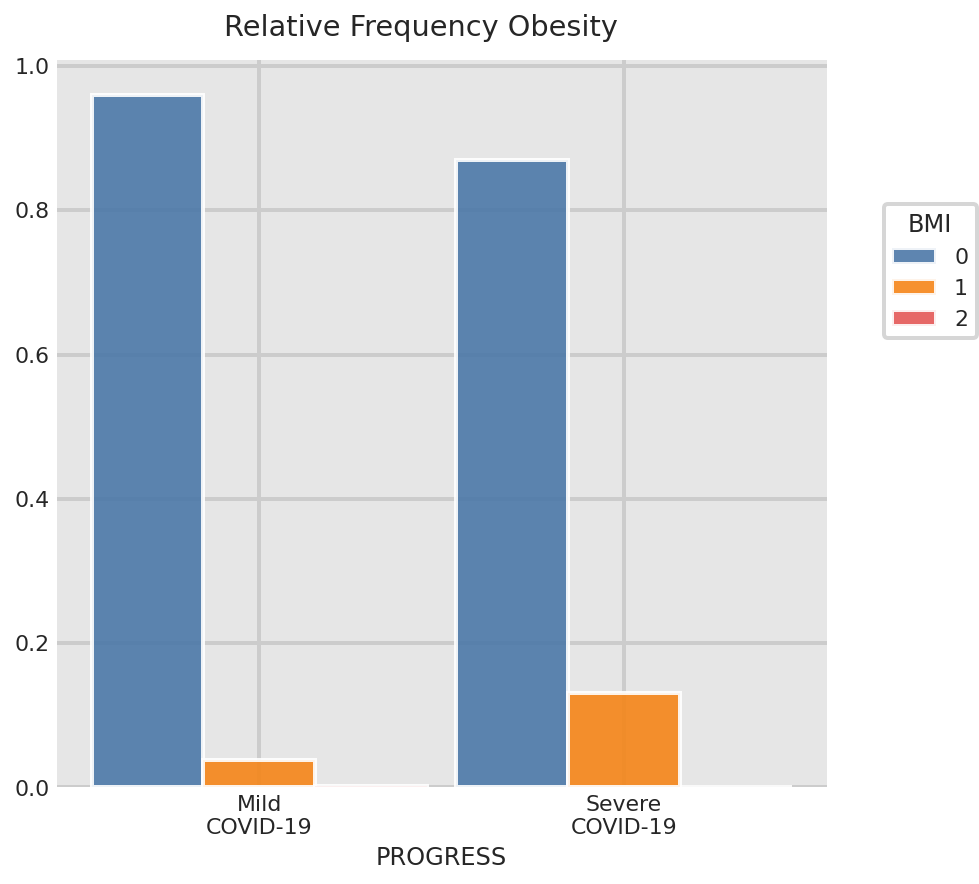

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_comorbidity, split='BMI', normalize='PROGRESS', title='Relative Frequency Obesity', figsize=[6.0,6.0])

**Koronare Herzerkrankung**

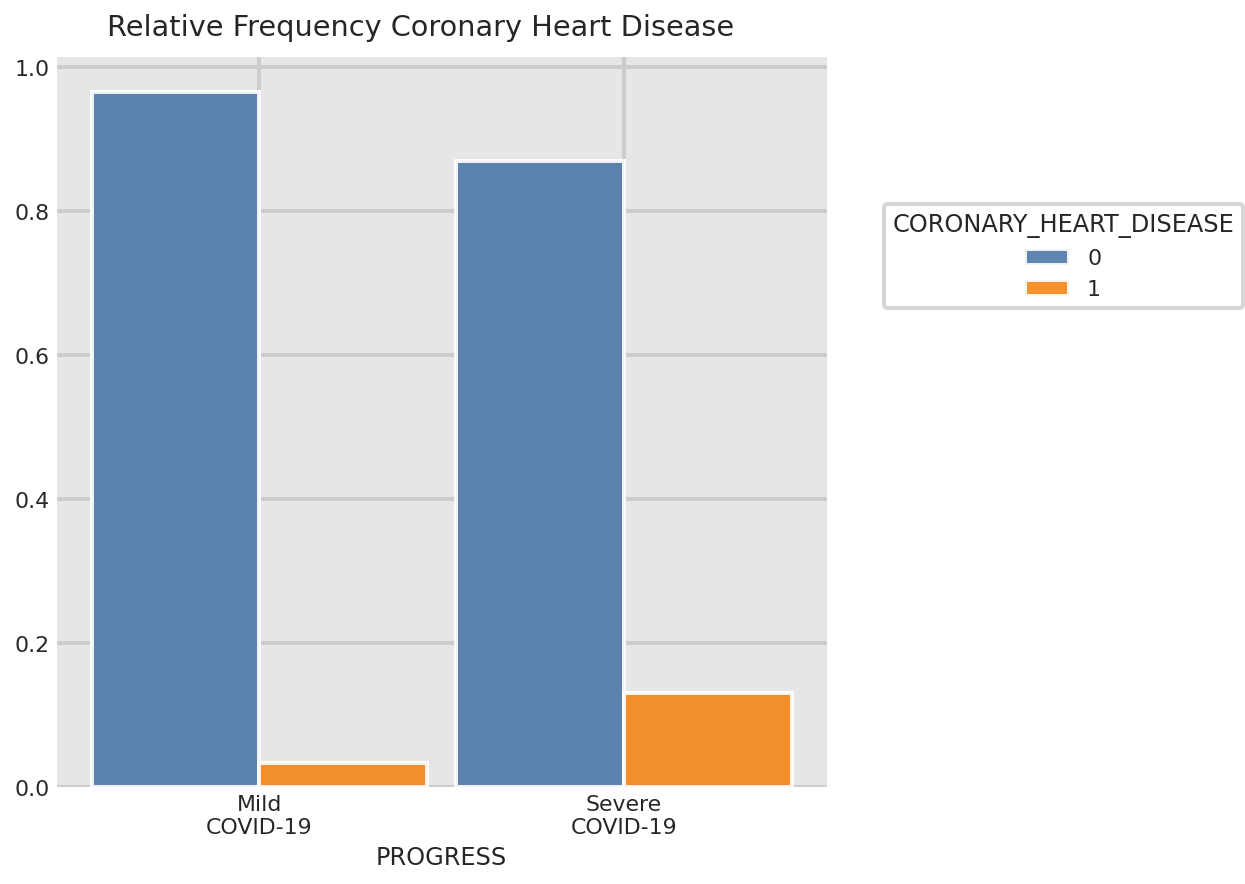

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_comorbidity, split='CORONARY_HEART_DISEASE', normalize='PROGRESS', title='Relative Frequency Coronary Heart Disease', figsize=[6.0,6.0])

**Race**

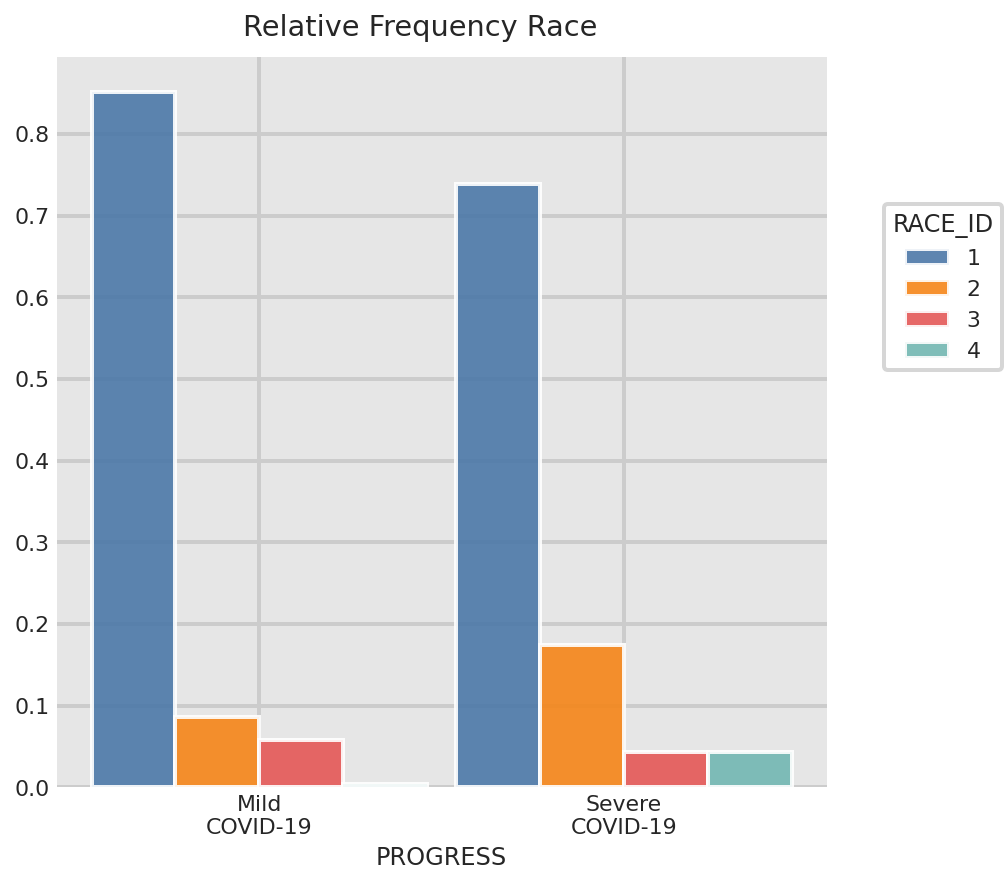

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_comorbidity, split='RACE_ID', normalize='PROGRESS', title='Relative Frequency Race', figsize=[6.0,6.0])

**Geschlecht**

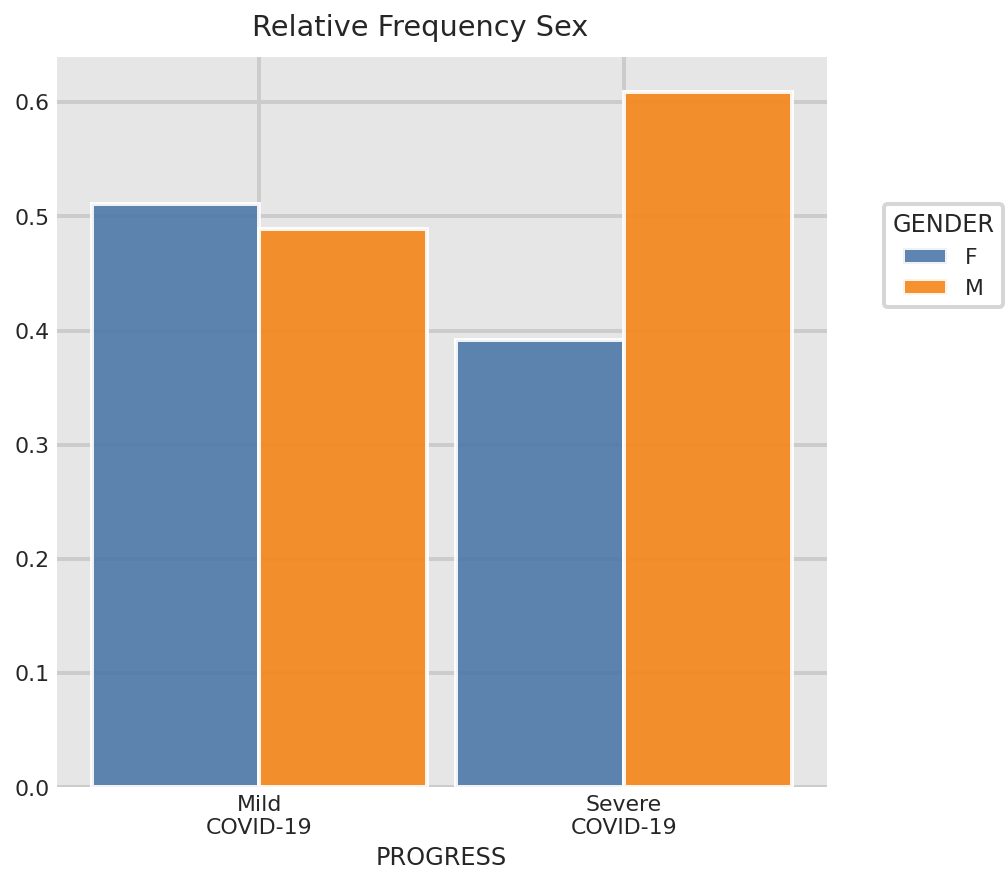

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_comorbidity, split='GENDER', normalize='PROGRESS', title='Relative Frequency Sex', figsize=[6.0,6.0])

Verstorbene Patienten
DEATHY

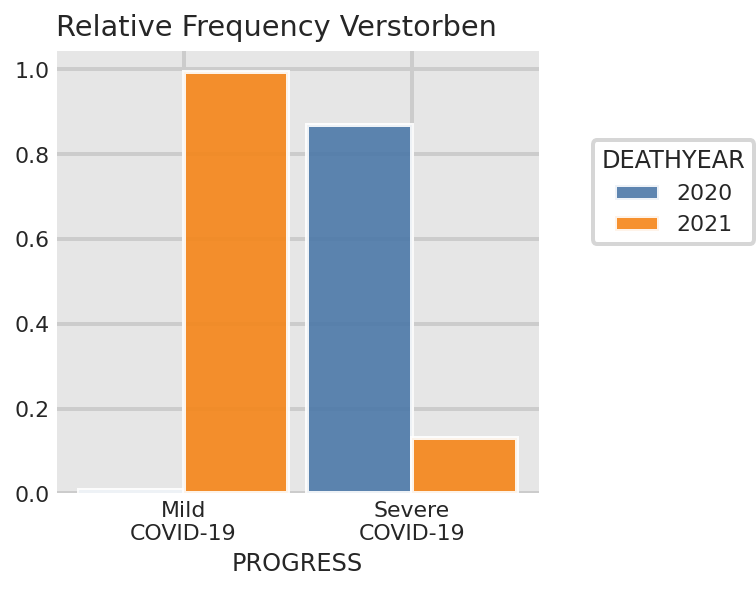

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_comorbidity, split='DEATHYEAR', normalize='PROGRESS', title='Relative Frequency Verstorben', figsize=[4.0,4.0])

###Korrelationsmatrix Vorerkrankungen



Data frame - Transformation

In [ ]:
#Progress muss in 1 bzw. 0 überführt werden. Mild COVID-19: 0 and Severe COVID-19: 1
df_covid_comorbidity["PROGRESS"] = df_covid_comorbidity["PROGRESS"].replace(["Severe COVID-19","Mild COVID-19"],["1","0"])

In [ ]:
#Objects müssen in integers transformiert werden
df_covid_comorbidity[[ "BMI", "CORONARY_HEART_DISEASE", "PROGRESS"]] = df_covid_comorbidity[["BMI", "CORONARY_HEART_DISEASE", "PROGRESS"]].apply(pd.to_numeric)

In [ ]:
df_covid_comorbidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PATIENT                 951 non-null    object
 1   BIRTHYEAR               951 non-null    int64 
 2   DEATHYEAR               951 non-null    int64 
 3   MARITAL                 951 non-null    object
 4   MARITAL_ID              951 non-null    int64 
 5   RACE                    951 non-null    object
 6   RACE_ID                 951 non-null    int64 
 7   ETHNICITY               951 non-null    object
 8   ETHNICITY_ID            951 non-null    int64 
 9   GENDER                  951 non-null    object
 10  GENDER_ID               951 non-null    int64 
 11  CITY                    951 non-null    object
 12  CITY_ID                 951 non-null    int64 
 13  AGE                     951 non-null    int64 
 14  STUDY                   951 non-null    object
 15  BMI   

In [ ]:
df_covid_comorbidity.head(3)

,PATIENT,BIRTHYEAR,DEATHYEAR,MARITAL,MARITAL_ID,RACE,RACE_ID,ETHNICITY,ETHNICITY_ID,GENDER,GENDER_ID,CITY,CITY_ID,AGE,STUDY,BMI,CORONARY_HEART_DISEASE,PROGRESS
0,1c40fa86e8b68b6719d752474e321733,1960,2020,M,1,white,1,nonhispanic,1,M,2,Wellesley,129,60,COVID-19,0,0,1
1,3becdcd73c8e32dfb67d21d2bf0cfa09,1998,2020,M,1,white,1,nonhispanic,1,M,2,Wrentham,101,22,COVID-19,0,0,1
2,3c51c7967432c9cadec1f28910c03dfa,1998,2020,M,1,white,1,hispanic,2,M,2,Rutland,152,22,COVID-19,0,0,1


Erstellung der Matrix

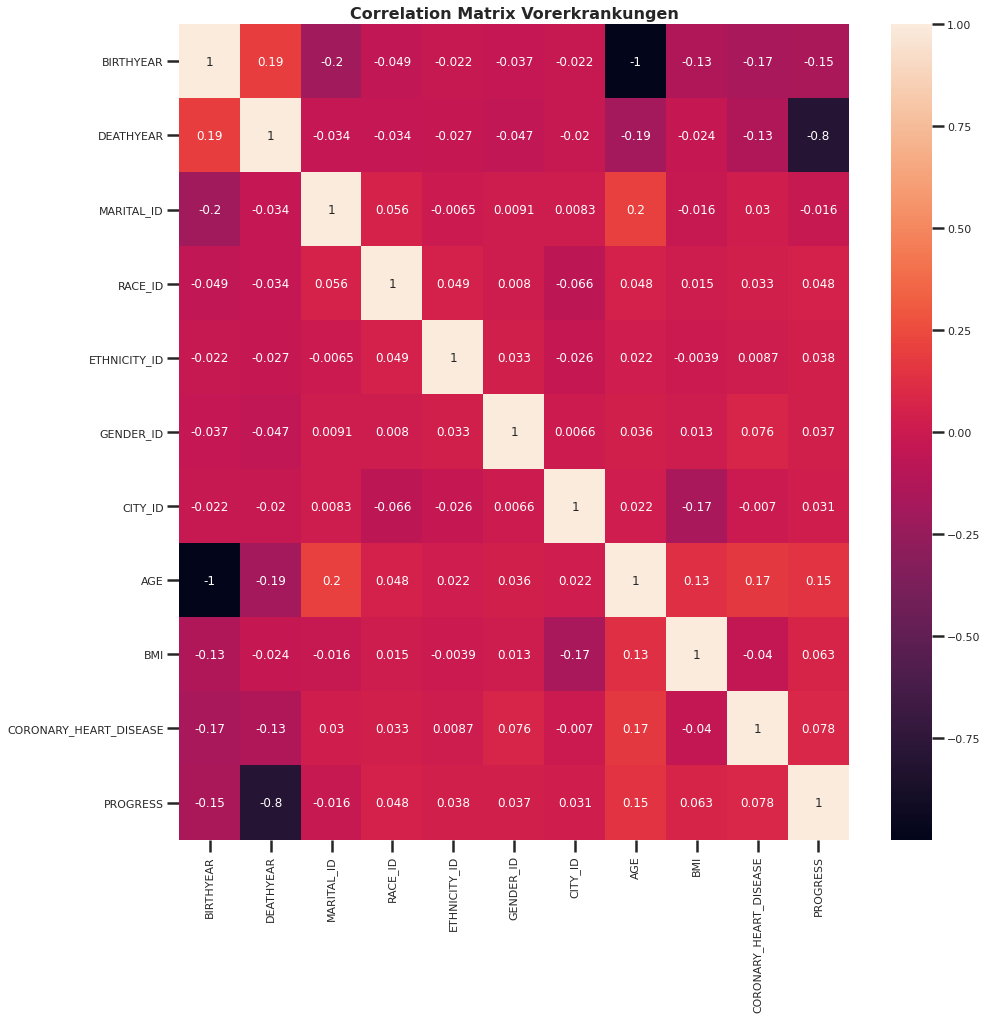

In [ ]:
# Generating the correlating matrix
corr = df_covid_comorbidity.corr()

plt.figure(figsize=(15, 15))
# Generating the correlation heat-map
sns.heatmap(corr, annot=True)
plt.title(label="Correlation Matrix Vorerkrankungen", weight='bold').set_fontsize('16') 

## 6.2. Klinik 

###Erstellung des Data frame

In [ ]:
# create temporary table

cursor_dwh.executescript("""
   DROP table if exists clinic;
create table clinic as
select 
  DISTINCT vo.PATIENT,
  vo.BIRTHYEAR ,
  vo.DEATHYEAR ,
  vo.MARITAL ,
  dm.ID MARITAL_ID,
  vo.RACE ,
  dr.ID RACE_ID,
  vo.ETHNICITY ,
  de.ID ETHNICITY_ID,
  vo.GENDER ,
  dg.ID GENDER_ID,
  vo.CITY ,
  dc.ID CITY_ID,
  vo.AGE ,
  vo.STUDY,
  '0' FEVER, -- condition
  '0' O2ADM, --procedure
  --'0' O2SAT, -- observation
  '0' LOSS_TASTE, -- condition
  CASE 
      WHEN vp.DESCRIPTION LIKE '%endo%tube%' 
        THEN 'Severe COVID-19' 
      ELSE 'Mild COVID-19' 
    END PROGRESS 
  from v_observations vo
  join v_procedures vp
    on vp.PATIENT = vo.PATIENT
  join dimCity dc
    on vo.CITY = dc.CITY 
  join dimRace dr
    on dr.RACE = vo.RACE 
  join dimEthnicity de
    on vo.ETHNICITY = de.ETHNICITY 
  join dimGender dg
    on dg.GENDER = vo.GENDER 
  join dimMarital dm
    on dm.MARITAL = vo.MARITAL 
  where vo.DESCRIPTION LIKE '%SARS-CoV-2%' 
  AND VALUE LIKE 'Detected%' 
  GROUP by vo.PATIENT
  having max(LENGTH(PROGRESS))
  ORDER BY PROGRESS DESC; 
 
 
 
update clinic set FEVER = '1' where PATIENT IN (select PATIENT FROM v_conditions WHERE DESCRIPTION LIKE 'Fev%');
update clinic set LOSS_TASTE = '1' where PATIENT IN (select PATIENT FROM v_conditions WHERE DESCRIPTION LIKE 'Loss o%');
update clinic set O2ADM = '1' where PATIENT IN (select PATIENT FROM v_procedures WHERE DESCRIPTION LIKE 'Oxy%ad%');
""")

In [ ]:
df_covid_clinic = pd.read_sql_query("select * from clinic;", conn)
cursor_dwh.execute("drop table if exists clinic")
df_covid_clinic.head(3)

,PATIENT,BIRTHYEAR,DEATHYEAR,MARITAL,MARITAL_ID,RACE,RACE_ID,ETHNICITY,ETHNICITY_ID,GENDER,GENDER_ID,CITY,CITY_ID,AGE,STUDY,FEVER,O2ADM,LOSS_TASTE,PROGRESS
0,1c40fa86e8b68b6719d752474e321733,1960,2020,M,1,white,1,nonhispanic,1,M,2,Wellesley,129,60,COVID-19,1,1,1,Severe COVID-19
1,3becdcd73c8e32dfb67d21d2bf0cfa09,1998,2020,M,1,white,1,nonhispanic,1,M,2,Wrentham,101,22,COVID-19,1,1,0,Severe COVID-19
2,3c51c7967432c9cadec1f28910c03dfa,1998,2020,M,1,white,1,hispanic,2,M,2,Rutland,152,22,COVID-19,1,1,1,Severe COVID-19


###Analyse

**Fieber**

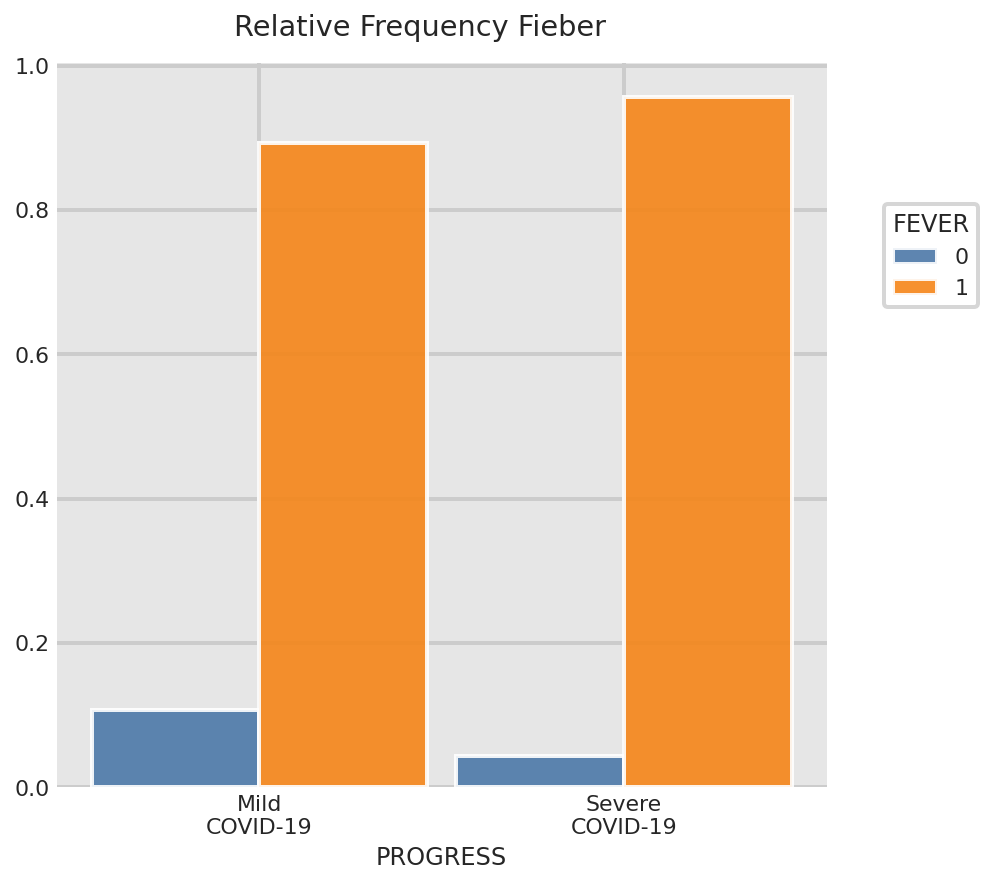

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_clinic, split='FEVER', normalize='PROGRESS', title='Relative Frequency Fieber', figsize=[6,6])

**Sauerstoffgabe über eine Maske**

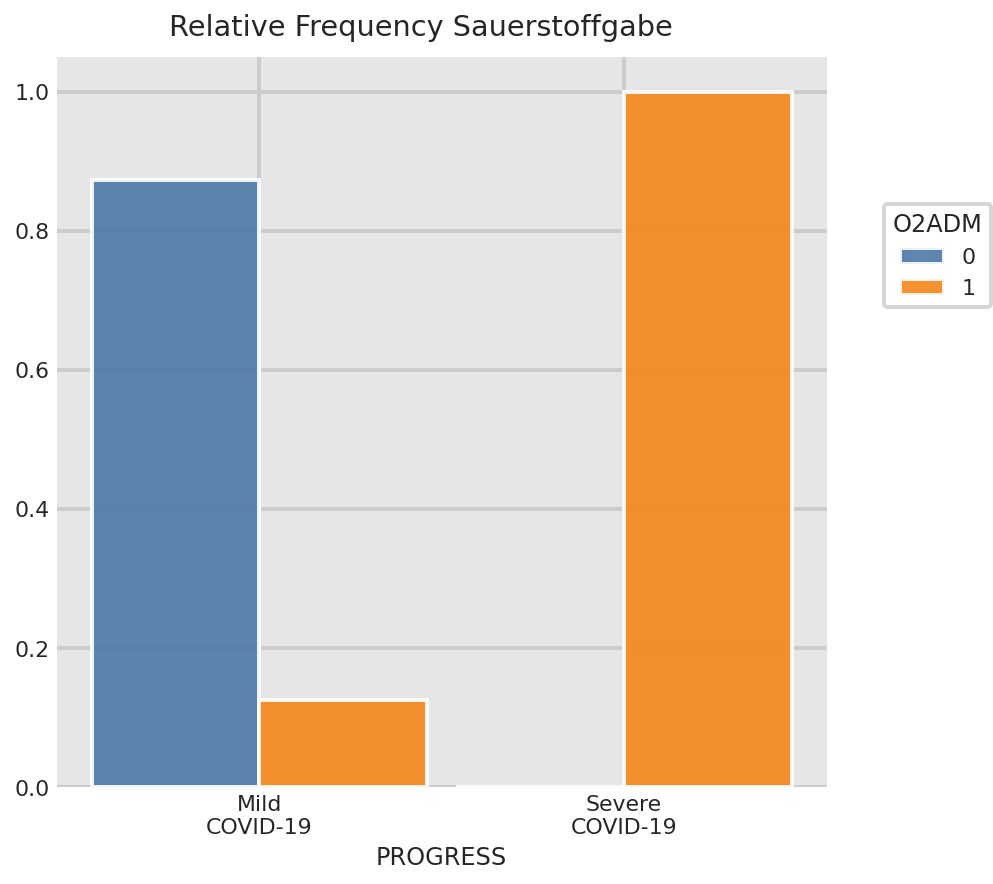

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_clinic, split='O2ADM', normalize='PROGRESS', title='Relative Frequency Sauerstoffgabe', figsize=[6.0,6.0])

**Geschmacksverlust**

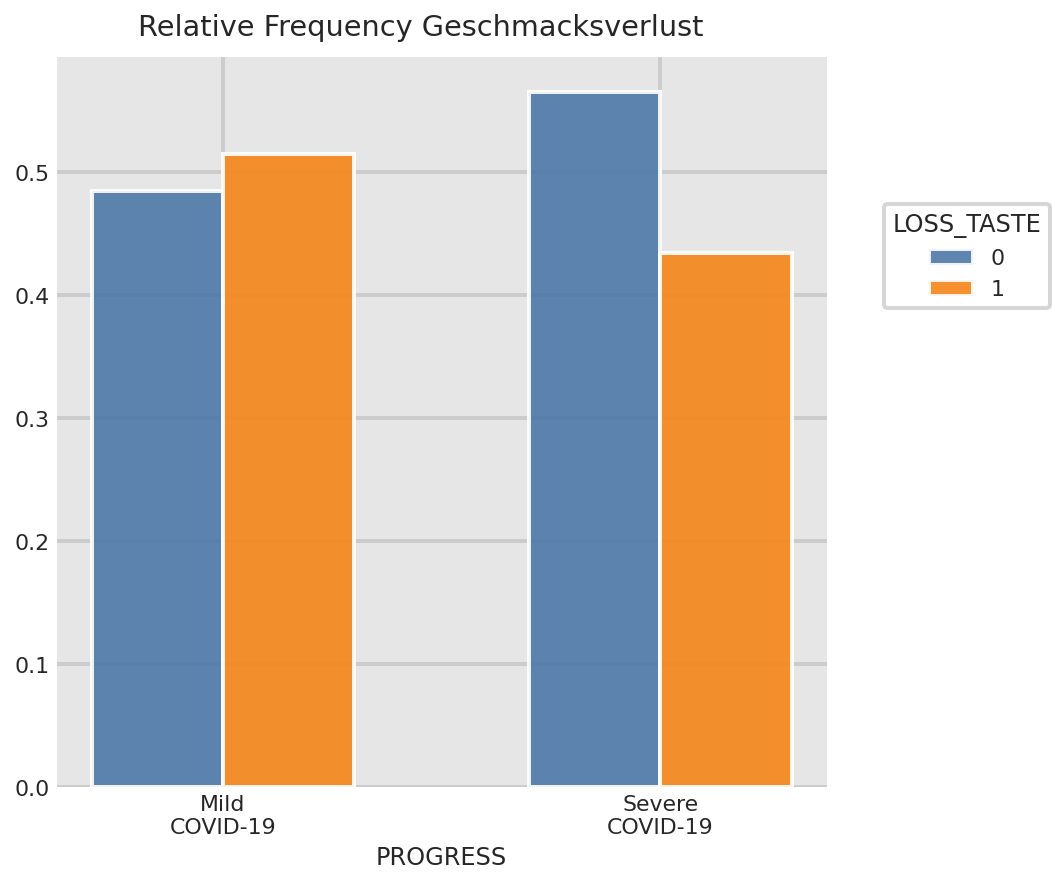

In [ ]:
dxp.count(val='PROGRESS', data=df_covid_clinic, split='LOSS_TASTE', normalize='PROGRESS', title='Relative Frequency Geschmacksverlust', size=0.6, figsize=[6.0,6.0])

### Korrelationsmatrix Klinik

Data frame - Transformation

In [ ]:
#Progress muss in 1 bzw. 0 überführt werden. Mild COVID-19: 0 and Severe COVID-19: 1
df_covid_clinic["PROGRESS"] = df_covid_clinic["PROGRESS"].replace(["Severe COVID-19","Mild COVID-19"],["1","0"])

In [ ]:
df_covid_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PATIENT       951 non-null    object
 1   BIRTHYEAR     951 non-null    int64 
 2   DEATHYEAR     951 non-null    int64 
 3   MARITAL       951 non-null    object
 4   MARITAL_ID    951 non-null    int64 
 5   RACE          951 non-null    object
 6   RACE_ID       951 non-null    int64 
 7   ETHNICITY     951 non-null    object
 8   ETHNICITY_ID  951 non-null    int64 
 9   GENDER        951 non-null    object
 10  GENDER_ID     951 non-null    int64 
 11  CITY          951 non-null    object
 12  CITY_ID       951 non-null    int64 
 13  AGE           951 non-null    int64 
 14  STUDY         951 non-null    object
 15  FEVER         951 non-null    object
 16  O2ADM         951 non-null    object
 17  LOSS_TASTE    951 non-null    object
 18  PROGRESS      951 non-null    object
dtypes: int64

In [ ]:
#Objects müssen in integers transformiert werden
df_covid_clinic[["FEVER", "O2ADM", "LOSS_TASTE", "PROGRESS"]] = df_covid_clinic[["FEVER", "O2ADM", "LOSS_TASTE", "PROGRESS"]].apply(pd.to_numeric)
df_covid_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PATIENT       951 non-null    object
 1   BIRTHYEAR     951 non-null    int64 
 2   DEATHYEAR     951 non-null    int64 
 3   MARITAL       951 non-null    object
 4   MARITAL_ID    951 non-null    int64 
 5   RACE          951 non-null    object
 6   RACE_ID       951 non-null    int64 
 7   ETHNICITY     951 non-null    object
 8   ETHNICITY_ID  951 non-null    int64 
 9   GENDER        951 non-null    object
 10  GENDER_ID     951 non-null    int64 
 11  CITY          951 non-null    object
 12  CITY_ID       951 non-null    int64 
 13  AGE           951 non-null    int64 
 14  STUDY         951 non-null    object
 15  FEVER         951 non-null    int64 
 16  O2ADM         951 non-null    int64 
 17  LOSS_TASTE    951 non-null    int64 
 18  PROGRESS      951 non-null    int64 
dtypes: int64

Erstellung der Matrix

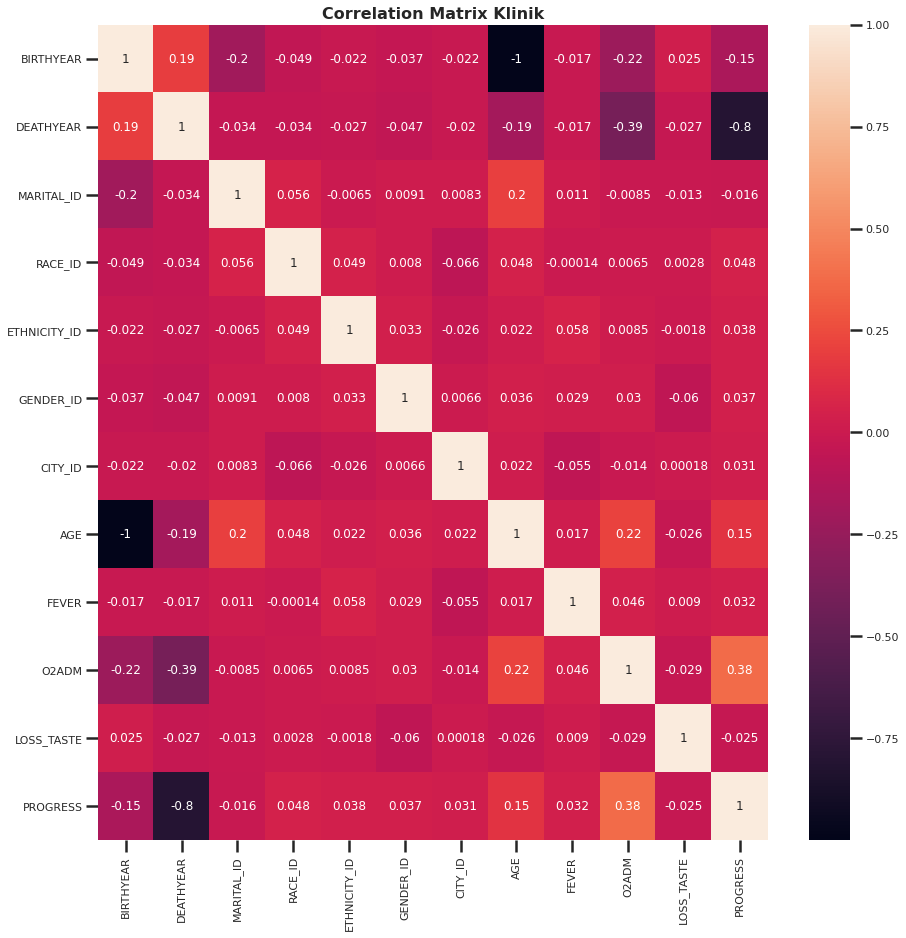

In [ ]:
# Generating the correlating matrix
corr = df_covid_clinic.corr()

plt.figure(figsize=(15, 15))
# Generating the correlation heat-map
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix Klinik', weight='bold').set_fontsize('16')

## 6.3. Laborwerte

###Einleitung


Für die Korrelationsanalyse wurden die folgenden Parameter durchgeführt:

1.  **Glomeruläre Filtrationsrate (GFR)**
2.   Das **Verhältnis** von **Neutrophilen Granulozyten zu Lymphozyten** im Differentialblutbild (Studie kann [hier](https://www.springermedizin.de/covid-19/predictive-values-of-neutrophil-to-lymphocyte-ratio-on-disease-s/18590612) abgerufen werden.)



###Parameter




|LOINC-CODE|Messung|Abkürzung|
|-|-|-|
|33914-3|	Glomerular filtration rate/1.73 sq M.predicted|GFR|
|731-0	| Lymphocytes [#/volume] in Blood by Automated count||
|751-8	| Neutrophils [#/volume] in Blood by Automated count||
| - |Lymphozyten / Neutrophilen Verhältnis |LNR|

###Erstellung des Dataframe

In [ ]:
df_covid_labor = pd.read_sql_query("""
    select DISTINCT 
  vo.PATIENT,   
  CASE 
    WHEN vp.DESCRIPTION LIKE '%endo%tube%' 
    THEN 'Severe COVID-19' 
    ELSE 'Mild COVID-19' 
  END PROGRESS,
  vo1.VALUE GFR,
  vo3.VALUE / vo2.VALUE NLR
from v_observations vo
join v_procedures vp
  on vp.PATIENT = vo.PATIENT
join v_observations vo1
  on vo.PATIENT = vo1.PATIENT
join v_observations vo2
  on vo.PATIENT = vo2.PATIENT
join v_observations vo3
  on vo3.PATIENT = vo.PATIENT 
where vo.DESCRIPTION LIKE '%SARS-CoV-2%' 
AND vo.VALUE LIKE 'Detected%'
AND vo1.DESCRIPTION LIKE 'Glom%'
and vo2.DESCRIPTION LIKE 'Lym%vo%'
and vo3.DESCRIPTION LIKE 'Neut%vo%'
and vo2.DATE = vo3.DATE 
GROUP by vo.PATIENT
having max(LENGTH(PROGRESS))
ORDER BY PROGRESS DESC; 
""", conn)

df_covid_labor.head(3)

,PATIENT,PROGRESS,GFR,NLR
0,1c40fa86e8b68b6719d752474e321733,Severe COVID-19,93.5,3.833333
1,3becdcd73c8e32dfb67d21d2bf0cfa09,Severe COVID-19,158.5,4.285714
2,3c51c7967432c9cadec1f28910c03dfa,Severe COVID-19,104.0,3.857143


In [ ]:
df_covid_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PATIENT   140 non-null    object 
 1   PROGRESS  140 non-null    object 
 2   GFR       140 non-null    object 
 3   NLR       140 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.5+ KB


Die GFR muss von **object** in **float** transferiert werden.

In [ ]:
df_covid_labor['GFR'] = df_covid_labor['GFR'].astype(float)

In [ ]:
df_covid_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PATIENT   140 non-null    object 
 1   PROGRESS  140 non-null    object 
 2   GFR       140 non-null    float64
 3   NLR       140 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.5+ KB


###6.3.1. Glomeruläre Filtrationsrate (Nierenfunktion)

####Plotting

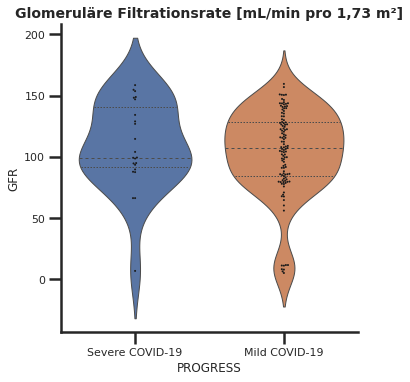

In [ ]:
#Swarm+Violin Plot + IQR
l = sns.catplot(data=df_covid_labor, x="PROGRESS", y="GFR", kind="violin", inner="quart", linewidth=1)
sns.swarmplot(data=df_covid_labor, x="PROGRESS", y="GFR", color="k", size=2, ax=l.ax)
plt.title('Glomeruläre Filtrationsrate [mL/min pro 1,73 m²]', weight='bold').set_fontsize('14')

####Deskriptive Statistik

In [ ]:
#Deskriptive Statistik GFR - SEVERE COVID-19
df_lab_severe_covid = df_covid_labor[df_covid_labor["PROGRESS"] == 'Severe COVID-19']
df_lab_severe_covid["GFR"].describe()

count     23.000000
mean     108.869565
std       36.175311
min        6.900000
25%       91.600000
50%       99.400000
75%      140.550000
max      158.500000
Name: GFR, dtype: float64

In [ ]:
#Deskriptive Statistik GFR - Mild COVID-19
df_lab_mild_covid = df_covid_labor[df_covid_labor["PROGRESS"] == 'Mild COVID-19']
df_lab_mild_covid["GFR"].describe()

count    117.000000
mean     103.381197
std       35.440239
min        5.200000
25%       84.300000
50%      107.200000
75%      128.100000
max      159.500000
Name: GFR, dtype: float64

####Statistische Analye

#####Alternativ- und Nullhypothese

1. Nullhypothese: Der Mittelwerte für GFR unterscheiden sich nicht in Severe vs. Mild COVID-19
2. Alternativhypothese: Der  Mittelwerte für NLR unterscheidet sich in Severe vs. Mild COVID-19

#####Transformation der Daten 

In [ ]:
# Transformation einer DF-Säule in einen numpy array
gfr_s = df_lab_severe_covid["GFR"].to_numpy()
gfr_m = df_lab_mild_covid["GFR"].to_numpy()

#####Berechnung des T-Testes für die Mittelwerte der beiden Gruppen (standard independent 2 sample  t-test)

In [ ]:
stats.ttest_ind(gfr_s, gfr_m, equal_var = True)

Ttest_indResult(statistic=0.6766956415348907, pvalue=0.4997317622557662)

#####Interpretation

Die Nullhypothese **kann nicht verworfen** werden, da der p-Value größer/gleich  5% ist.

#####Zusammenfassung


1.   Die durchschnittliche GFR der Patienten in der Gruppe "Severe COVID-19" war 108 mL/min pro 1,73 m².
2.   Das durchschnittliche NLR der Patienten in der Gruppe "Mild COVID-19" war 103 mL/min pro 1,73 m².
3.   Der Unterschied ist **statistisch nicht signifikant (P > 5%)** 


###6.3.2 Neutrophilen zu Lymphozyten Verhältnis (NLR)

####Plotting

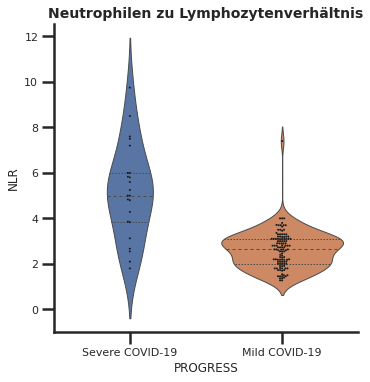

In [ ]:
l = sns.catplot(data=df_covid_labor, x="PROGRESS", y="NLR", kind="violin", inner="quart", linewidth=1)
sns.swarmplot(data=df_covid_labor, x="PROGRESS", y="NLR", color="k", size=2, ax=l.ax)
plt.title('Neutrophilen zu Lymphozytenverhältnis', weight='bold').set_fontsize('14')

####Deskriptive Statistik

In [ ]:
#Deskriptive Statistik NLR - SEVERE COVID-19
df_lab_severe_covid["NLR"].describe()

count    23.000000
mean      5.168695
std       2.052105
min       1.800000
25%       3.845238
50%       5.000000
75%       6.000000
max       9.750000
Name: NLR, dtype: float64

In [ ]:
#Deskriptive Statistik NLR - Mild COVID-19
df_lab_mild_covid["NLR"].describe()

count    117.000000
mean       2.631338
std        0.829436
min        1.272727
25%        2.000000
50%        2.636364
75%        3.100000
max        7.400000
Name: NLR, dtype: float64

####Statistische Analye

#####Alternativ- und Nullhypothese

1. Nullhypothese: Die Mittelwerte für NLR unterscheiden sich nicht in Severe vs. Mild COVID-19
2. Alternativhypothese: Die  Mittelwert für NLR unterscheiden sich in Severe vs. Mild COVID-19

#####Transformation der Daten 

In [ ]:
# Transformation einer DF-Säule in einen numpy array
s = df_lab_severe_covid["NLR"].to_numpy()
m = df_lab_mild_covid["NLR"].to_numpy()

#####Berechnung des T-Testes für die Mittelwerte der beiden Gruppen (Welch's unequal variances t-test)

Berechnung des T-Testes für die Mittelwerte der beiden Gruppen (Welch's unequal variances t-test)

In [ ]:
stats.ttest_ind(s, m, equal_var = False)

Ttest_indResult(statistic=5.836893071199855, pvalue=5.588936551891042e-06)

#####Interpretation

Die Nullhypothese kann verworfen werden, da der p-Value kleiner als 5% ist.

#####Zusammenfassung


1.   Das durchschnittliche NLR der Patienten in der Gruppe "Severe COVID-19" war 5,1.
2.   Das durchschnittliche NLR der Patienten in der Gruppe "Mild COVID-19" war 2,6.
3.   Der Unterschied ist **statistisch signifikant (P < 5%)** 


###6.3.3 Korrelationsanalyse

In [ ]:
#Progress muss in 1 bzw. 0 überführt werden. Mild COVID-19: 0 and Severe COVID-19: 1
df_covid_labor["PROGRESS"] = df_covid_labor["PROGRESS"].replace(["Severe COVID-19","Mild COVID-19"],["1","0"])

In [ ]:
#Objects müssen in integers transformiert werden
df_covid_labor[["PROGRESS"]] = df_covid_labor[["PROGRESS"]].apply(pd.to_numeric)

Text(0.5, 1.0, 'Correlation Matrix Labor')

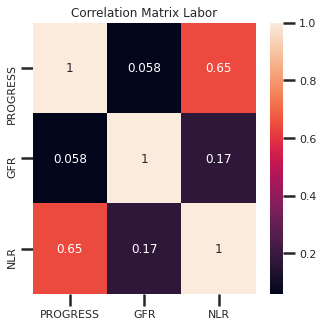

In [ ]:
# Generating the correlating matrix
corr = df_covid_labor.corr()

plt.figure(figsize=(5, 5))
# Generating the correlation heat-map
sns.heatmap(corr, annot=True)
plt.title(label="Correlation Matrix Labor")

### Scatterplots (nicht Teil der Präsentation)

####Vorerkrankungen

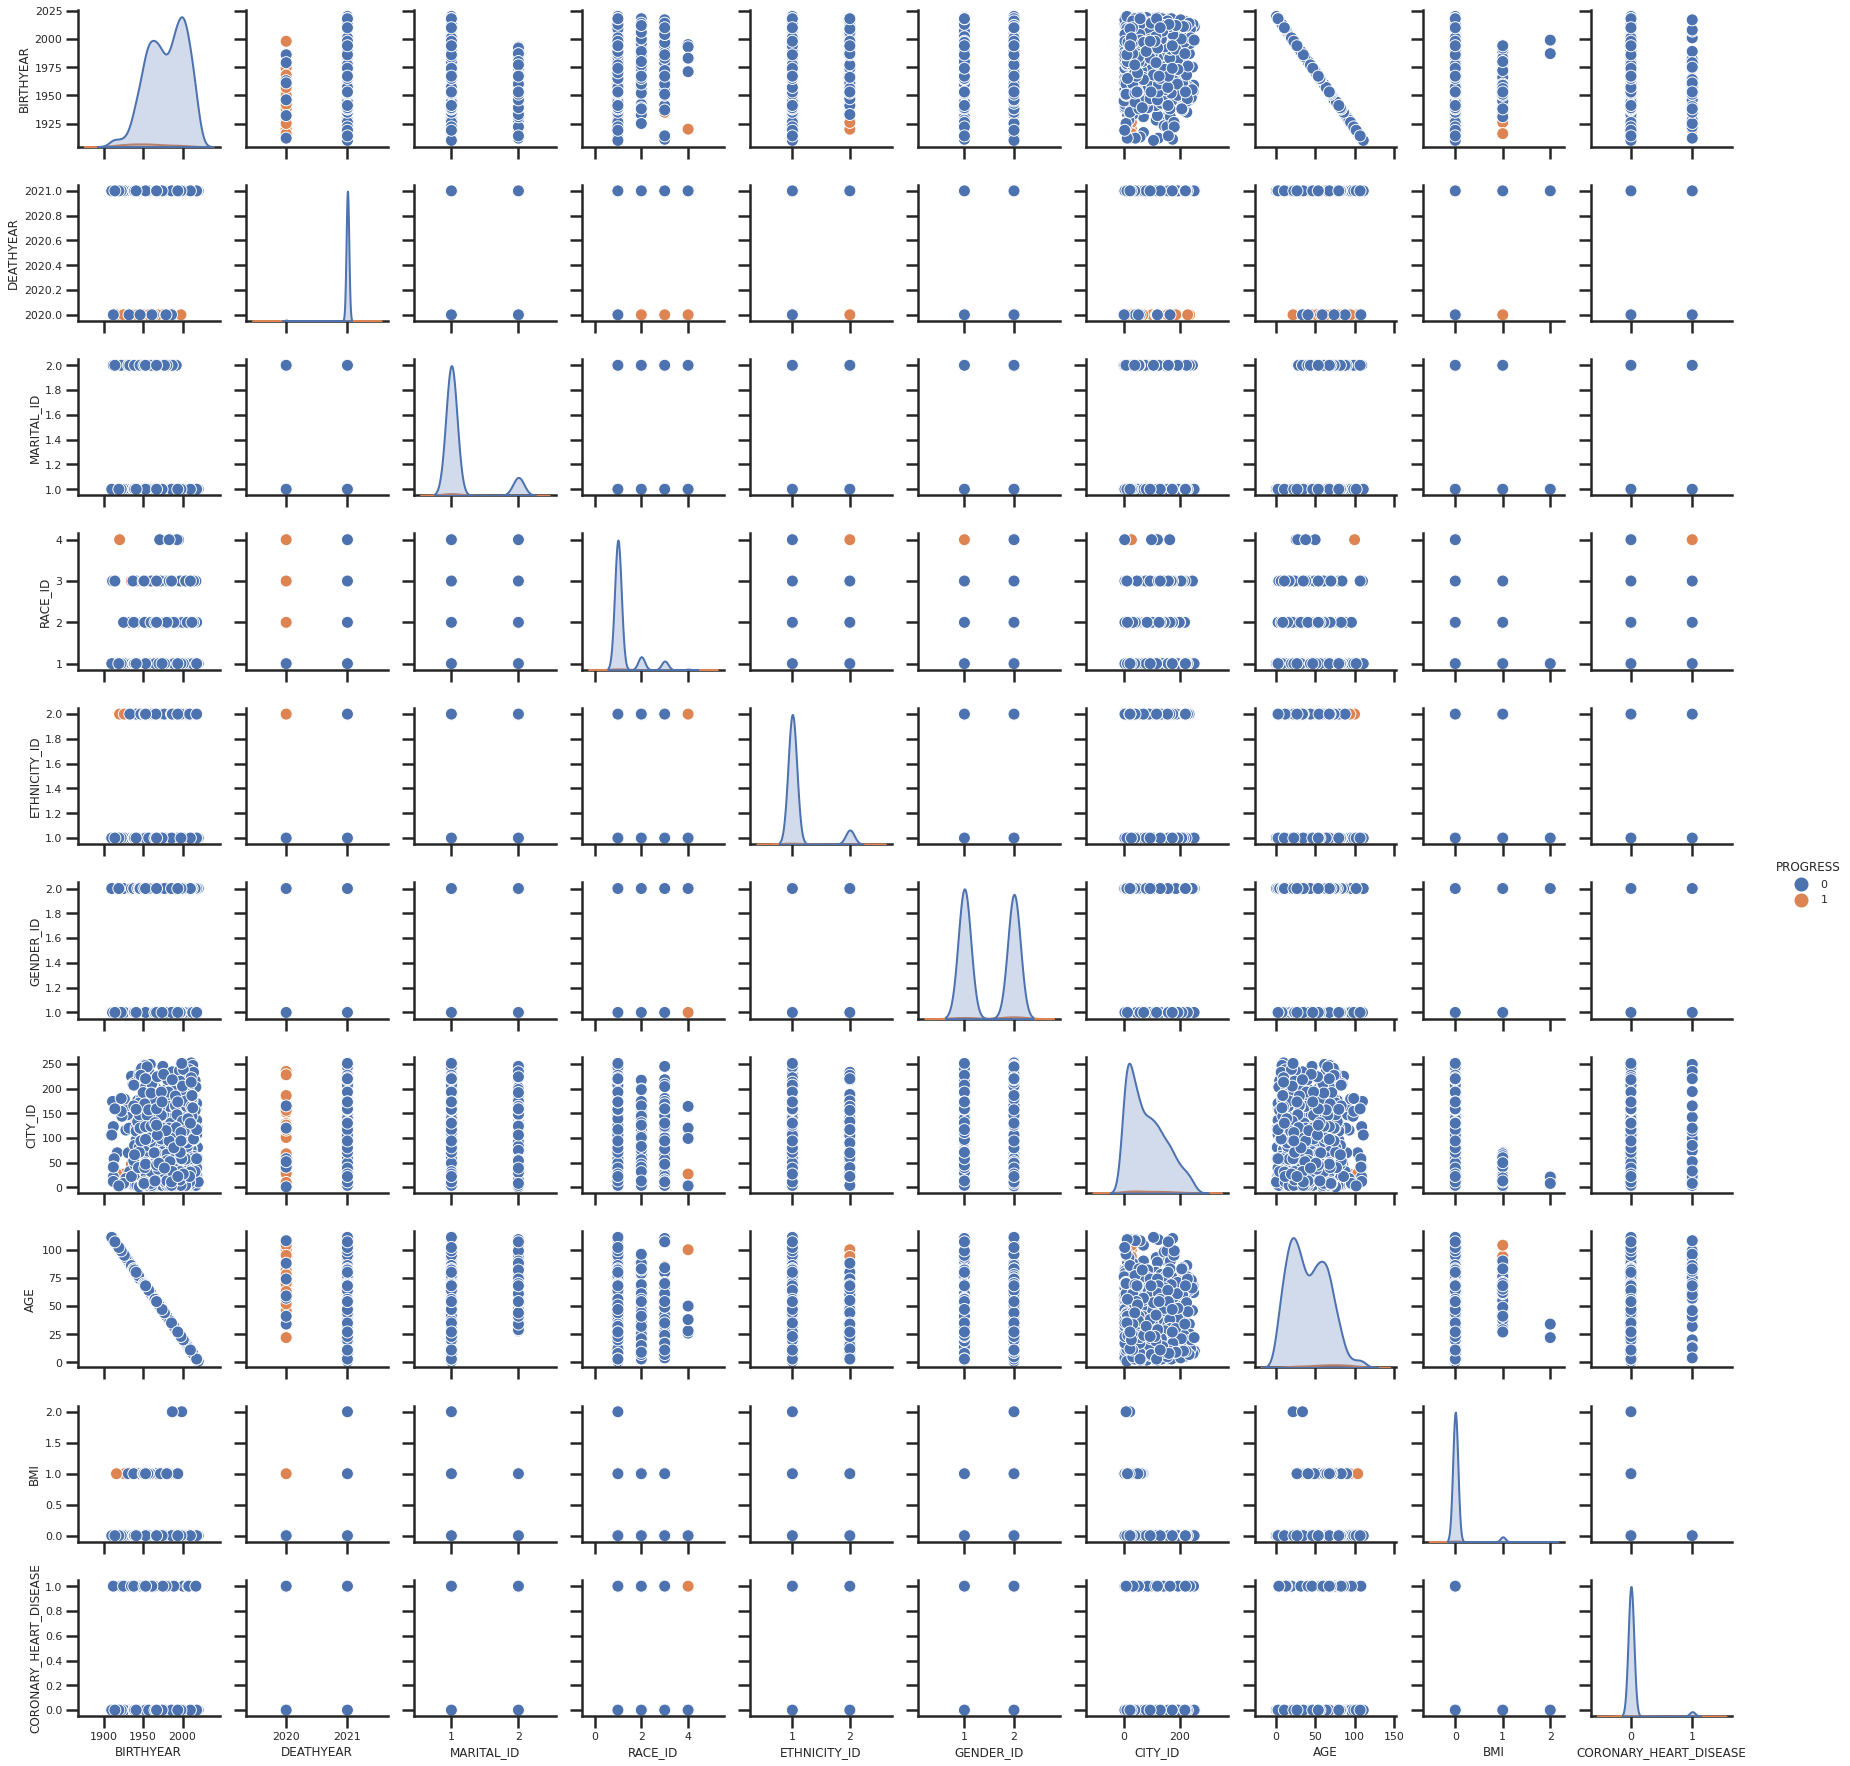

In [ ]:
sns.pairplot(data=df_covid_comorbidity, hue="PROGRESS")
plt.show()

#### Klinik

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


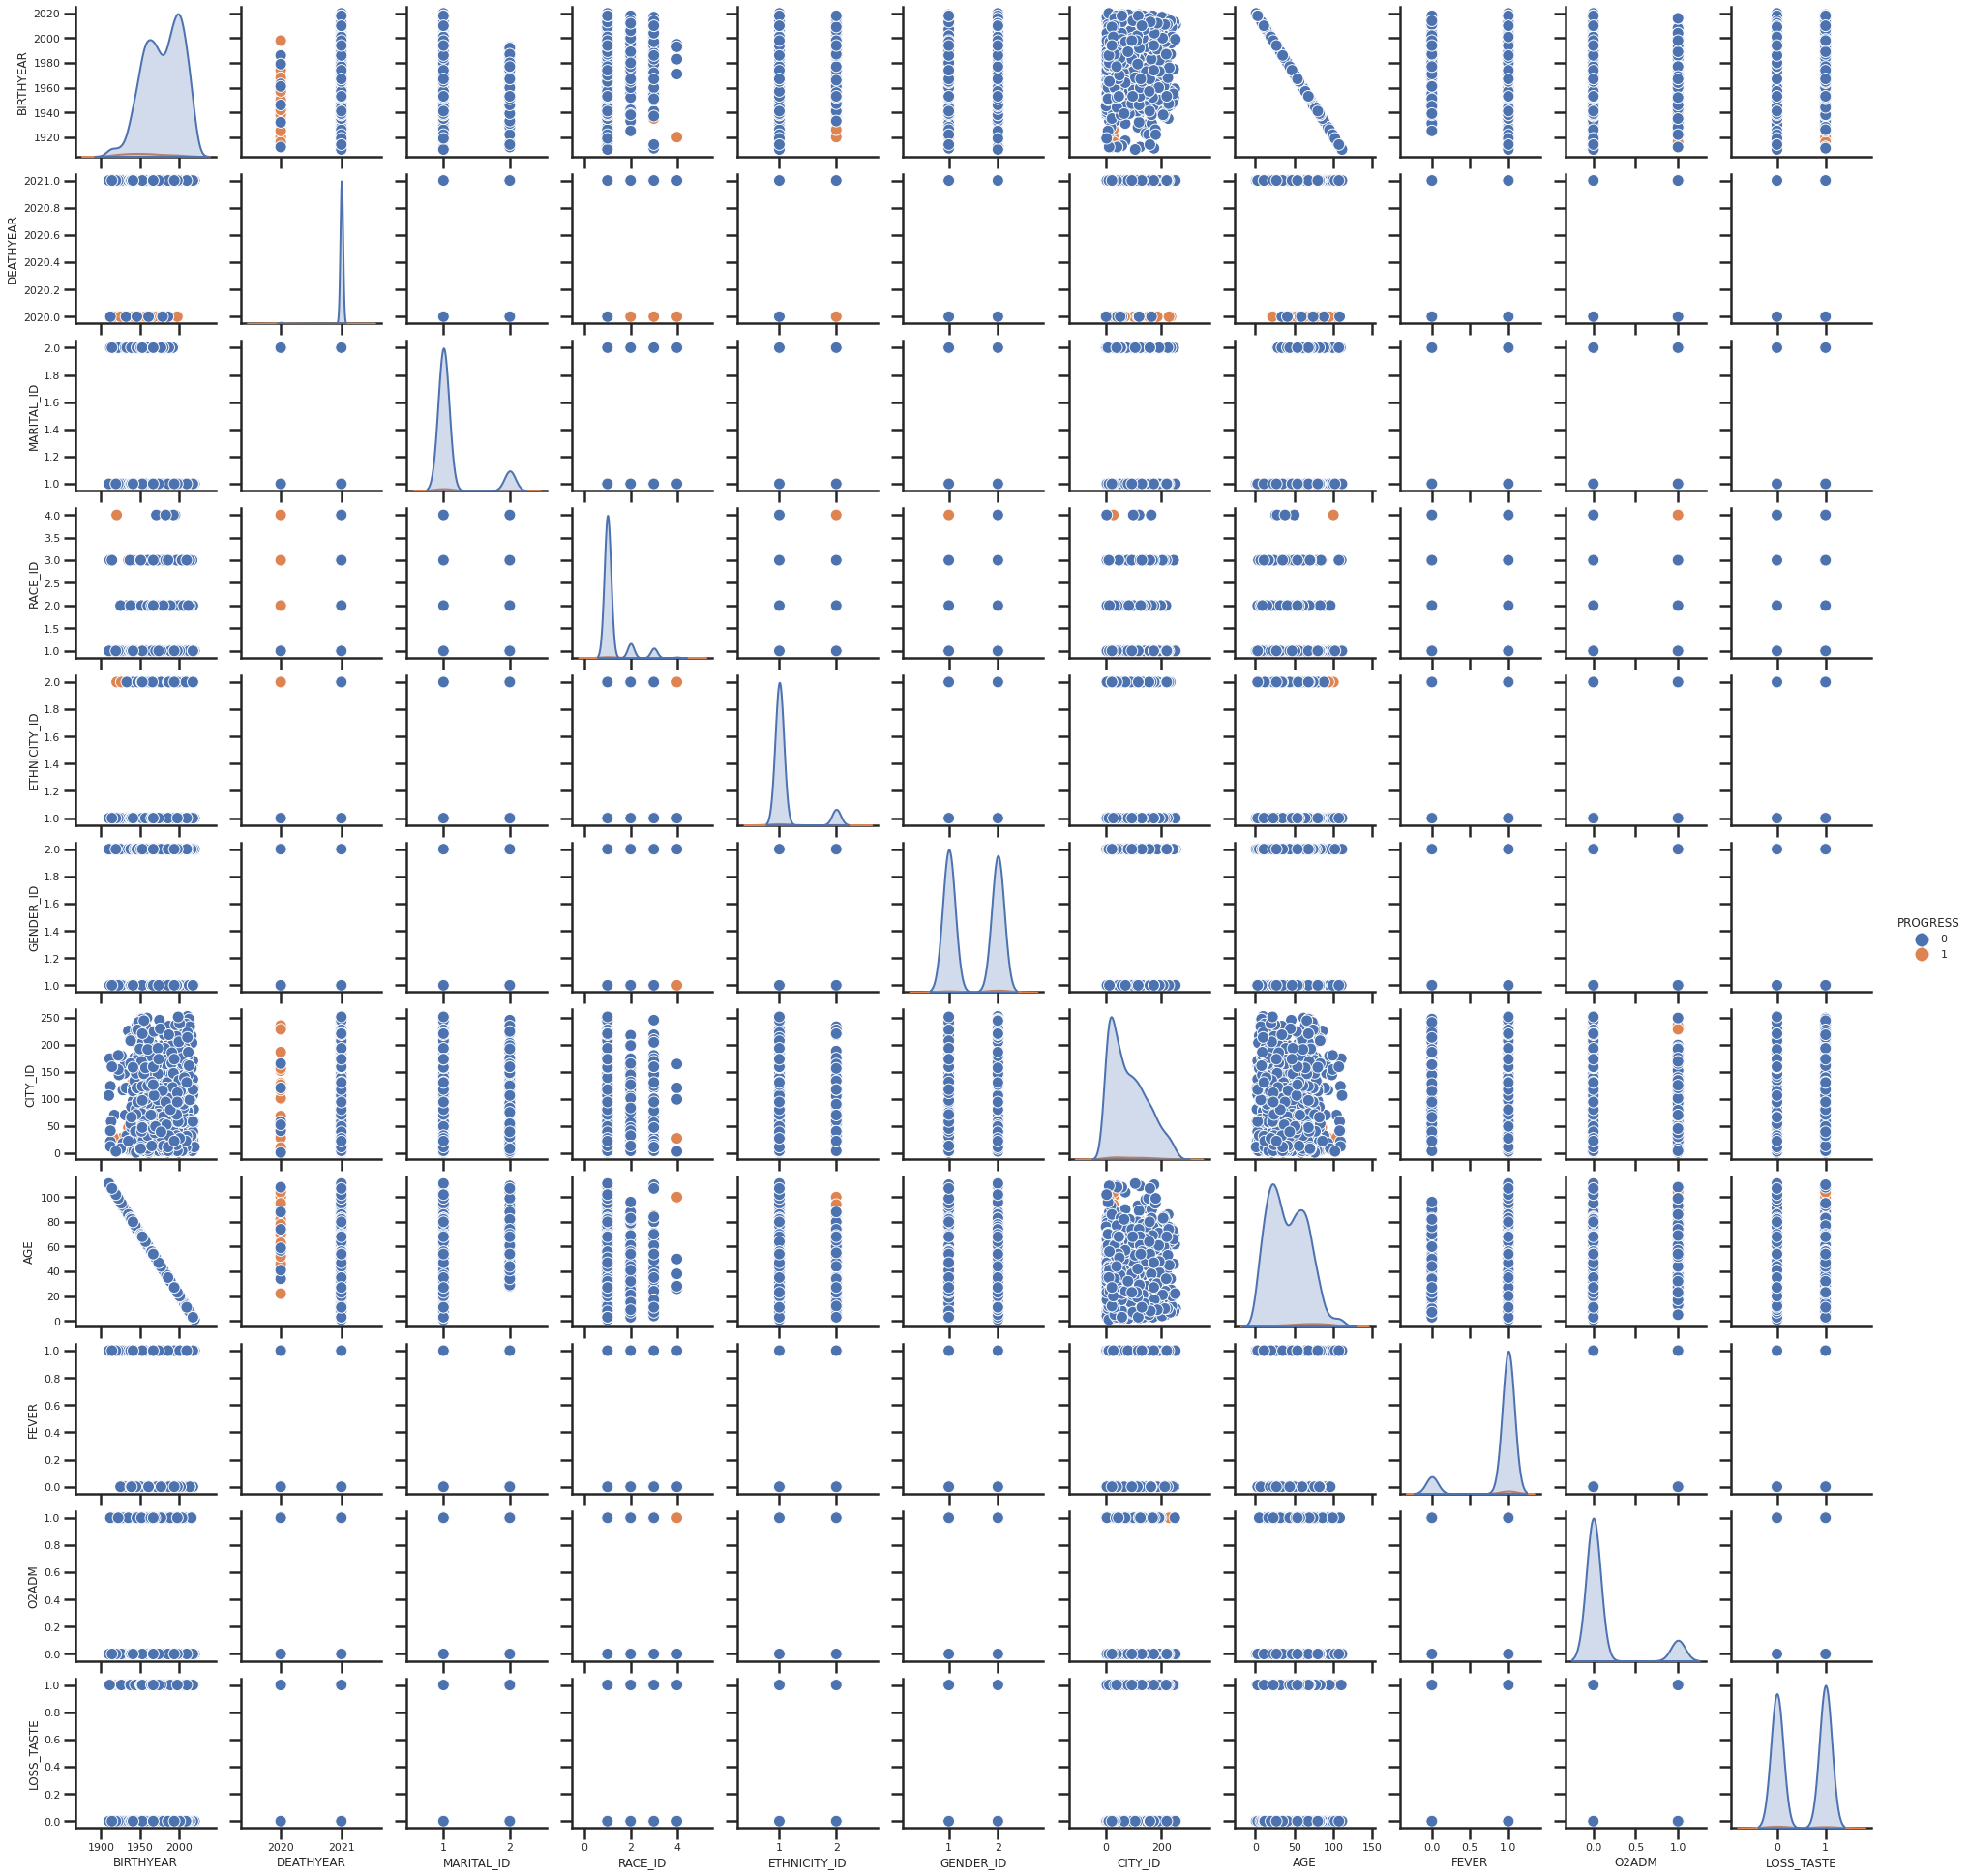

In [ ]:
sns.pairplot(data=df_covid_clinic, hue="PROGRESS")
plt.show()

#### Labor

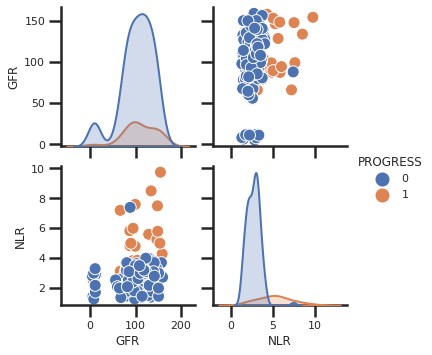

In [ ]:
sns.pairplot(data=df_covid_labor, hue="PROGRESS")
plt.show()

#Quellen
- Seaborn: https://seaborn.pydata.org/tutorial/data_structure.html
- pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
- [T-Test Dokumentation auf scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
- [Wikipedia-Eintrag zum Welch-T-Test](https://en.wikipedia.org/wiki/Welch%27s_t-test)